<div style="margin-bottom: -550px;">
  <div style="z-index:100;position:relative;padding:20px;">
      <h1> ML2 Presentation</h1>
      <h2>Predicting Chronic Kidney Disease</h2>
      <p style="float:left;">
      By, <br/>
     
      Jayanth <br/>
    
      </p>
  </div>

  <img 
  style="transform: translateY(-350px); z-index:1;"
  src="love-your-kidneys.GIF" 
  width="100%"
  height="100%"
  />
</div>

<img 
  style="transform: translateY(-10px); z-index:1;"
  src="KF2.JPEG" 
  width="70%"
  height="60%"
  />

## Problem Statement

Chronic Kidney Disease(CKD) is one of the most critical health problems due to its increasing prevelance. With increasing life expectancy and prevalence of life style diseases, US has seen a 30% increase in prevalence of chronic kidney disease (CKD) in the last decade. Unfortunately, from India there is no longitudinal study and limited data on the prevalence of CKD. In western countries, diabetes and hypertension account for over 2/3rd of the cases of CKD. In India too, diabetes and hypertension today account for 40–60% cases of CKD. In this presentation we aim to test the ability of machine learning algorithms for the prediction of chronic kidney disease using smallest subset of features.

## Source & Description of Dataset

* This dataset is based on CKD patients collected from Apollo Hospital, India in 2015 which was taken over 2 month period. It is downloaded from University of California, Irvine (UCI) data repository.

* The numerical features include: 'age', 'blood_pressure', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count'

* The categorical features include: 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'classification'

## Relevant Information about the Dataset:

* a.Number of Instances:  400 (250 CKD, 150 notckd)

* b.Number of Attributes: 24 + class = 25 ( 11  numeric ,14  nominal) 

* c.Attribute Information :

 	1.Age(numerical): age in years
    
 	2.Blood Pressure(numerical): bp in mm/Hg
	       	
 	3.Specific Gravity(nominal): sg - (1.005,1.010,1.015,1.020,1.025)
	  	
 	4.Albumin(nominal): al - (0,1,2,3,4,5)
		
 	5.Sugar(nominal): su - (0,1,2,3,4,5)
		
 	6.Red Blood Cells(nominal): rbc - (normal,abnormal)
		
 	7.Pus Cell (nominal): pc - (normal,abnormal)
		
 	8.Pus Cell clumps(nominal): pcc - (present,notpresent)
		
 	9.Bacteria(nominal): ba  - (present,notpresent)
		
 	10.Blood Glucose Random(numerical): bgr in mgs/dl		
		
 	11.Blood Urea(numerical): bu in mgs/dl
		
 	12.Serum Creatinine(numerical): sc in mgs/dl	
		
 	13.Sodium(numerical): sod in mEq/L
		
 	14.Potassium(numerical): pot in mEq/L
		
 	15.Hemoglobin(numerical): hemo in gms
		
 	16.Packed  Cell Volume(numerical)
    
 	17.White Blood Cell Count(numerical): wc in cells/cumm
		
 	18.Red Blood Cell Count(numerical): rc in millions/cmm	
		
 	19.Hypertension(nominal): htn - (yes,no)	
		
 	20.Diabetes Mellitus(nominal): dm - (yes,no)
		
 	21.Coronary Artery Disease(nominal): cad - (yes,no)
		
 	22.Appetite(nominal): appet - (good,poor)	
		
 	23.Pedal Edema(nominal): pe - (yes,no)
			
 	24.Anemia(nominal): ane - (yes,no)
		
 	25.Class (nominal): classification - (ckd,notckd)	
		

* d. Missing Attribute Values: Yes(Denoted by "?")

* e. Class Distribution: ( 2 classes)
    		Class 	  Number of instances
    		ckd          	  250
    		notckd       	  150   

## Table of Content

1. **[Import the required libraries](#lib)**
2. **[Missing Value Treatment](#missing)**
3. **[Outliers Treatment](#outlier)**
4. **[Encoding](#encoding)**
5. **[Fearture Selection for logistic Regression](#selection)**
6. **[Scaling and Splitting for train and test dataset](#scale)**
7. **[Logistic Regression (Stats Model)](#logit_stats)**
8. **[Logistic Regression (SciKitLearn Library)](#sklearn)**
7. **[KNN Algorithm](#knn)**
9. **[Naive Baye's Algorithm](#naive)**
10.**[Support Vector Machine](#svm)**
11.**[Decision Tree Algorithm](#decision)**
12.**[Random Forest Algorithm](#random)**
13.**[AdaBoost Classifier](#adaboost)**
14.**[Gradient Boosting](#gradboost)**
15.**[XGBoost Classifier](#xgboost)**
16.**[Conclusion](#conclusion)**

<a id="lib"> </a>
### Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.anova import anova_lm

from sklearn.datasets import make_classification
from sklearn import metrics 
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score, f1_score,r2_score
from sklearn.metrics import cohen_kappa_score, roc_auc_score, log_loss, roc_curve, confusion_matrix, plot_confusion_matrix 
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV, RandomizedSearchCV, KFold, StratifiedShuffleSplit
from sklearn.feature_selection import SequentialFeatureSelector as sfs, SelectKBest, f_classif

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.compose import make_column_transformer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

import joblib

from pandas_profiling import ProfileReport

pd.options.display.max_rows=None
pd.options.display.max_columns=None


In [2]:
df=pd.read_csv('chronic_kidney_disease.csv', na_values=['?','\t?'])
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [3]:
# code to remove all tab spaces in data our data. It is not trimmed.
df.replace('^\s+', '', regex=True, inplace=True) #front
df.replace('\s+$', '', regex=True, inplace=True) #end

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbccc   294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [5]:
#Change the data types of sg, al, su as per data definition
listObjectType=['sg','al','su']
for column in listObjectType:
    df[column]=df[column].astype('object')

In [6]:
df.head().T

,0,1,2,3,4
age,48,7,62,48,51
bp,80,50,80,70,80
sg,1.02,1.02,1.01,1.005,1.01
al,1,4,2,4,2
su,0,0,3,0,0
rbc,NaN,NaN,normal,normal,normal
pc,normal,normal,normal,abnormal,normal
pcc,notpresent,notpresent,notpresent,present,notpresent
ba,notpresent,notpresent,notpresent,notpresent,notpresent
bgr,121,NaN,423,117,106


In [7]:
profile = ProfileReport(df, title='CKD Profile Report', explorative=True)
profile.to_file('./CKD Profile Report.html')

<a id="missing"> </a>
## Missing Value Treatment

In [8]:
total=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()*100/len(df)).sort_values(ascending=False)
miss_val=pd.DataFrame({
    'Total Missing Values': total,
    'Percentage of Missing Values':percent
})
miss_val

,Total Missing Values,Percentage of Missing Values
rbc,152,38.00
rbcc,131,32.75
wbccc,106,26.50
pot,88,22.00
sod,87,21.75
pcv,71,17.75
pc,65,16.25
hemo,52,13.00
su,49,12.25
sg,47,11.75


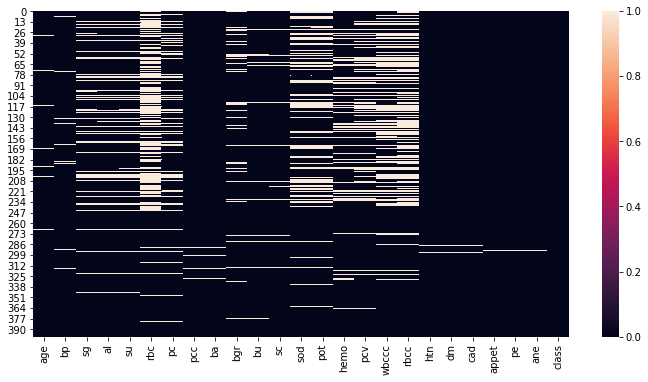

In [9]:
#Visualizing the null values using heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())
plt.show()

In [10]:
df_num=df.select_dtypes(include='number')
df_num.describe()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc
count,391.000000,388.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


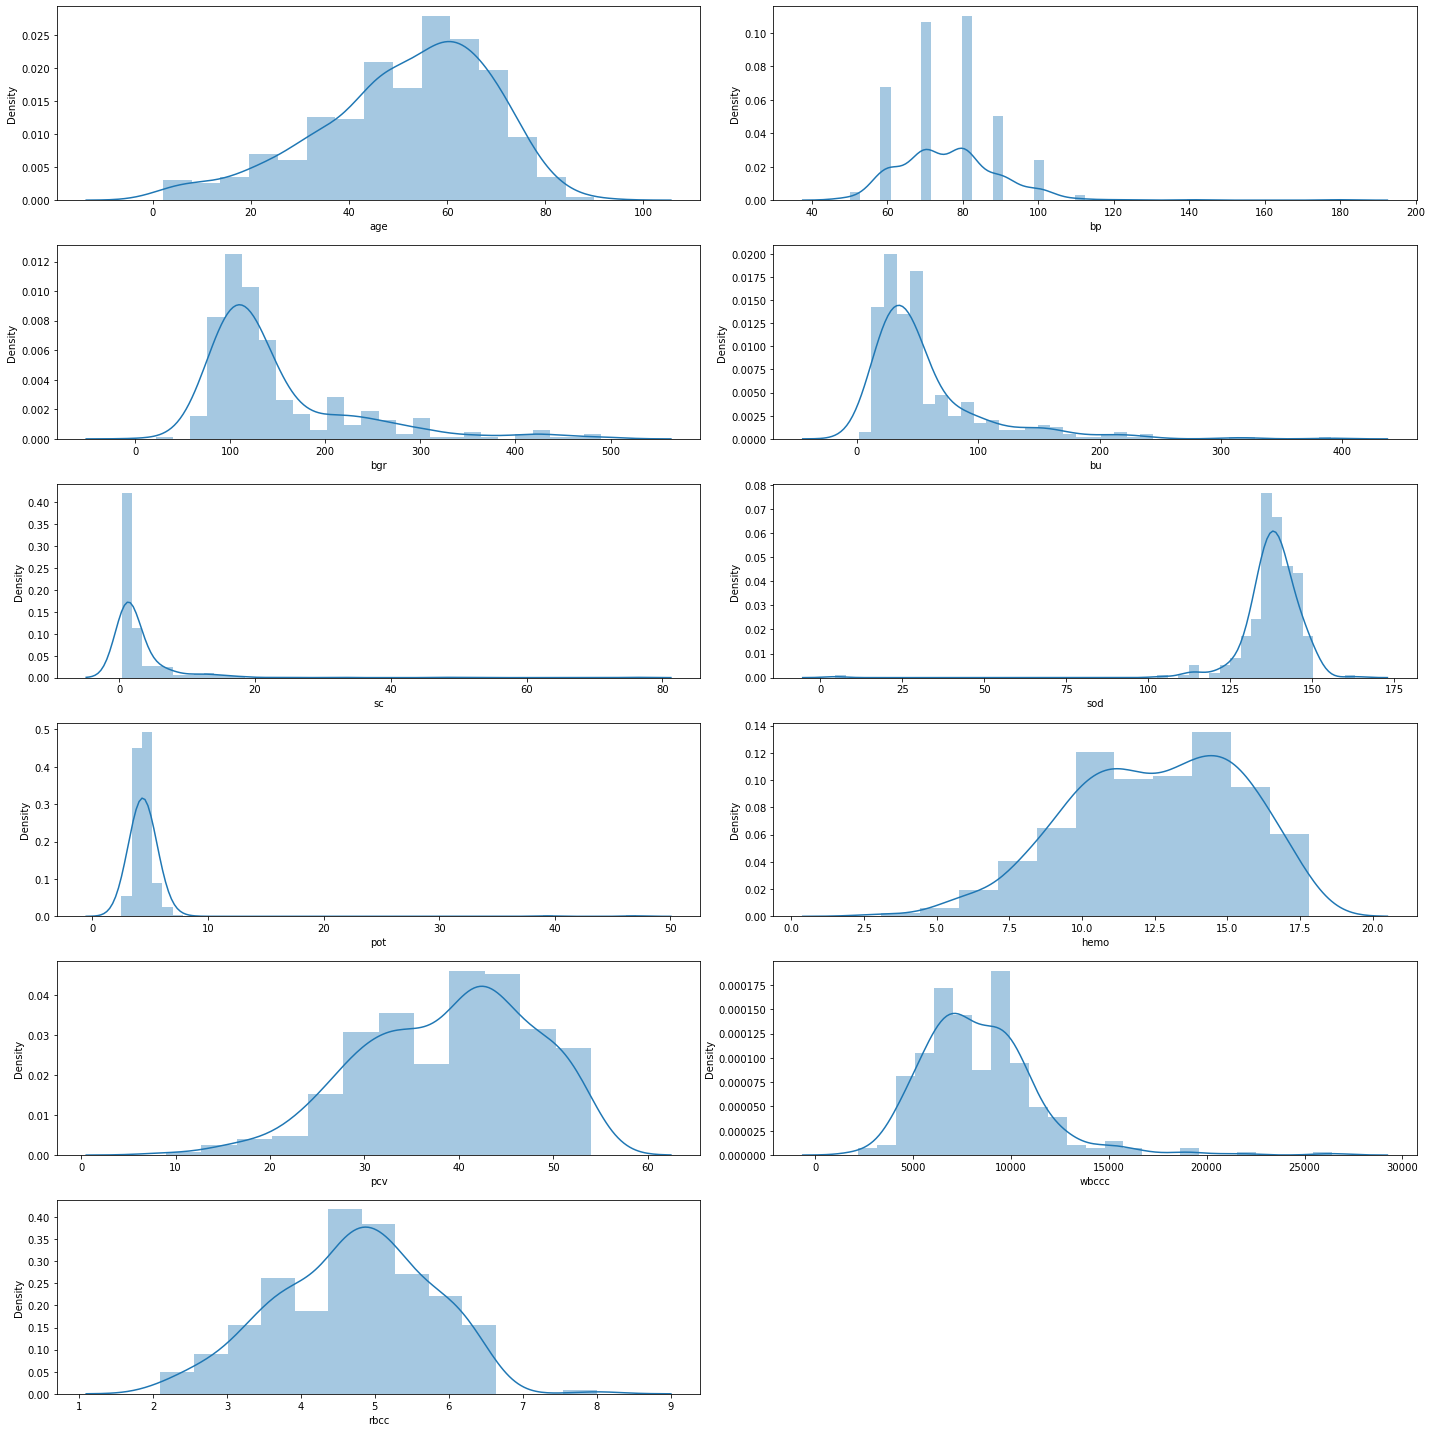

Skewness:


age      -0.668259
bp        1.605429
bgr       2.010773
bu        2.634374
sc        7.509538
sod      -6.996569
pot      11.582956
hemo     -0.335095
pcv      -0.433679
wbccc     1.621589
rbcc     -0.183329
dtype: float64

In [11]:
#Distribution of Numeric Variables by histogram
plt.figure(figsize=(20,20))
j=1
for i in df_num.columns:
    plt.subplot(6,2,j)
    sns.distplot(df_num[i])
    #plt.xlabel(df_num.columns[i], fontsize = 15)
    #plt.ylabel('Density', fontsize = 15)
    #plt.legend(loc="best",prop={'size': 15})
    j=j+1
plt.tight_layout()
plt.show()
print('Skewness:')
df_num.skew()

In [12]:
#Impute the missing values with KNNImputer
imp=KNNImputer()
df1_num=imp.fit_transform(df_num)
df1_num=pd.DataFrame(df1_num, columns=df_num.columns, index=df_num.index )
df1_num.head(2)

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc
0,48.0,80.0,121.0,36.0,1.2,138.8,4.3,15.4,44.0,7800.0,5.20
1,7.0,50.0,113.0,18.0,0.8,137.4,4.0,11.3,38.0,6000.0,4.96


In [13]:
df1_num.isnull().sum()

age      0
bp       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbccc    0
rbcc     0
dtype: int64

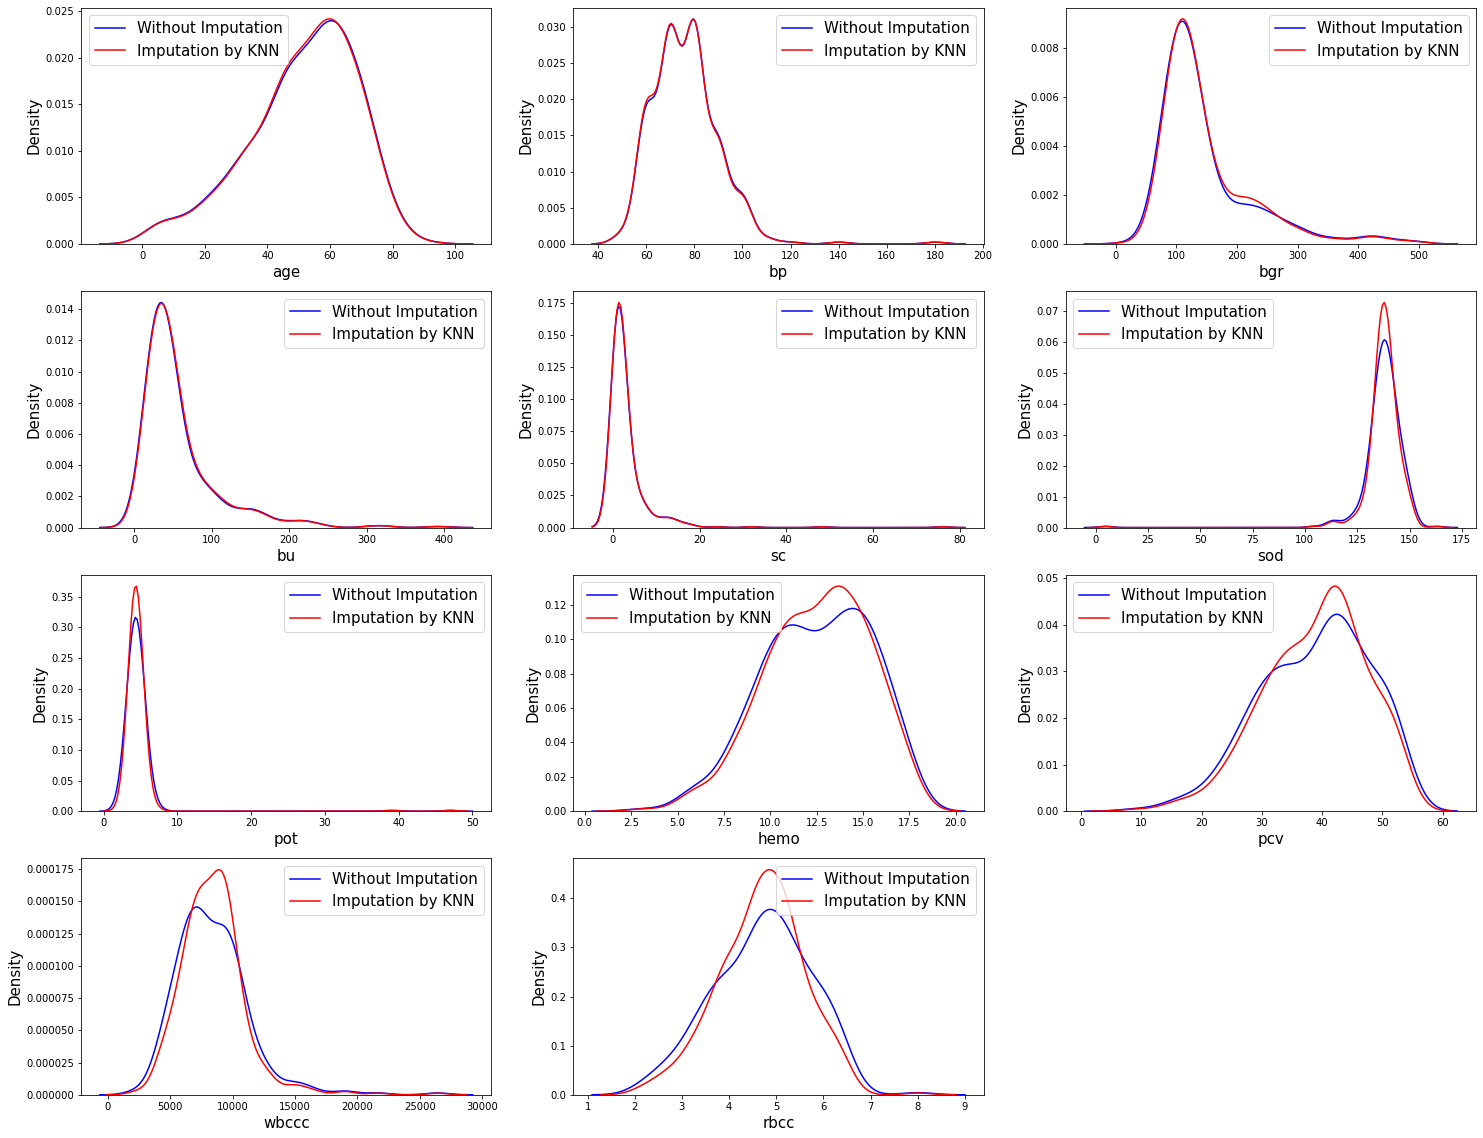

In [14]:
plt.figure(figsize=(25,20))
a=df1_num.columns
j=1
for i in range(0,df1_num.shape[1]):
    plt.subplot(4,3,j)
    sns.kdeplot(df_num.iloc[:,i],color='b',label='Without Imputation')
    sns.kdeplot(df1_num.iloc[:,i],color='r',label='Imputation by KNN')
    
    plt.xlabel(a[i],size = 15)
    plt.ylabel('Density', size = 15)
    plt.legend(loc="best",prop={'size': 15})
    j=j+1

<a id="encoding"></a>
### Encoding

In [15]:
df_cat=df.select_dtypes(include='object')
df_cat.head(2)

,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,1.02,1,0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,1.02,4,0,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [16]:
df1_cat=df_cat.copy()

In [17]:
print(df['rbc'].unique(), df['rbc'].value_counts(), sep='\n')

[nan 'normal' 'abnormal']
normal      201
abnormal     47
Name: rbc, dtype: int64


In [18]:
df1_cat['rbc']=df1_cat['rbc'].replace({'normal':0, 'abnormal':1})

In [19]:
print(df['pc'].unique(), df['pc'].value_counts(), sep='\n')

['normal' 'abnormal' nan]
normal      259
abnormal     76
Name: pc, dtype: int64


In [20]:
df1_cat['pc']=df1_cat['pc'].replace({'normal':0, 'abnormal':1})

In [21]:
print(df['pcc'].unique(), df['pcc'].value_counts(), sep='\n')

['notpresent' 'present' nan]
notpresent    354
present        42
Name: pcc, dtype: int64


In [22]:
df1_cat['pcc']=df1_cat['pcc'].replace({'notpresent':0, 'present':1})

In [23]:
print(df['ba'].unique(), df['ba'].value_counts(), sep='\n')

['notpresent' 'present' nan]
notpresent    374
present        22
Name: ba, dtype: int64


In [24]:
df1_cat['ba']=df1_cat['ba'].replace({'notpresent':0, 'present':1})

In [25]:
print(df['htn'].unique(), df['htn'].value_counts(), sep='\n')

['yes' 'no' nan]
no     251
yes    147
Name: htn, dtype: int64


In [26]:
df1_cat['htn']=df1_cat['htn'].replace({'no':0, 'yes':1})

In [27]:
print(df['dm'].unique(), df['dm'].value_counts(), sep='\n')

['yes' 'no' nan]
no     261
yes    137
Name: dm, dtype: int64


In [28]:
df1_cat['dm']=df1_cat['dm'].replace({'no':0, 'yes':1,'\tno':0,  ' yes':1, '\tyes':1 })

In [29]:
print(df['cad'].unique(), df['cad'].value_counts(), sep='\n')

['no' 'yes' nan]
no     364
yes     34
Name: cad, dtype: int64


In [30]:
df1_cat['cad']=df1_cat['cad'].replace({'no':0, 'yes':1,'\tno':0})

In [31]:
print(df['appet'].unique(), df['appet'].value_counts(), sep='\n')

['good' 'poor' nan]
good    317
poor     82
Name: appet, dtype: int64


In [32]:
df1_cat['appet']=df1_cat['appet'].replace({'good':0, 'poor':1})

In [33]:
print(df['pe'].unique(), df['pe'].value_counts(), sep='\n')

['no' 'yes' nan]
no     323
yes     76
Name: pe, dtype: int64


In [34]:
df1_cat['pe']=df1_cat['pe'].replace({'no':0, 'yes':1})

In [35]:
print(df['ane'].unique(), df['ane'].value_counts(), sep='\n')

['no' 'yes' nan]
no     339
yes     60
Name: ane, dtype: int64


In [36]:
df1_cat['ane']=df1_cat['ane'].replace({'no':0, 'yes':1})

In [37]:
print(df['class'].unique(), df['class'].value_counts(), sep='\n')

['ckd' 'notckd']
ckd       250
notckd    150
Name: class, dtype: int64


In [38]:
df1_cat['class']=df1_cat['class'].replace({'notckd':0, 'ckd':1,'ckd\t':1})

In [39]:
df1_cat['class'].value_counts()

1    250
0    150
Name: class, dtype: int64

In [40]:
#Imputing Categorical Variables by KNN Imputer
imp_cat=KNNImputer()
df2_cat=imp_cat.fit_transform(df1_cat)
df2_cat=pd.DataFrame(df2_cat, columns=df1_cat.columns, index=df1_cat.index )
df2_cat.head()

,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,1.020,1.0,0.0,0.2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.020,4.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.010,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,1.005,4.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
4,1.010,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [41]:
df2_cat['pc'].value_counts()

0.0    280
1.0     77
0.2     19
0.4     14
0.8      5
0.6      5
Name: pc, dtype: int64

In [42]:
round(df2_cat['pc'],0).value_counts()

0.0    313
1.0     87
Name: pc, dtype: int64

In [43]:
round(df2_cat['rbc'],0).value_counts()

0.0    326
1.0     74
Name: rbc, dtype: int64

In [44]:
round(df2_cat['pcc'],0).value_counts()

0.0    358
1.0     42
Name: pcc, dtype: int64

In [45]:
df2_cat['ba'].value_counts()

0.0    378
1.0     22
Name: ba, dtype: int64

In [46]:
round(df2_cat['htn'],0).value_counts()

0.0    253
1.0    147
Name: htn, dtype: int64

In [47]:
round(df2_cat['dm'],0).value_counts()

0.0    263
1.0    137
Name: dm, dtype: int64

In [48]:
df2_cat['cad'].value_counts()

0.0    366
1.0     34
Name: cad, dtype: int64

In [49]:
df2_cat['appet'].value_counts()

0.0    318
1.0     82
Name: appet, dtype: int64

In [50]:
df2_cat['pe'].value_counts()

0.0    324
1.0     76
Name: pe, dtype: int64

In [51]:
round(df2_cat['ane'],0).value_counts()

0.0    340
1.0     60
Name: ane, dtype: int64

In [52]:
dfv1=pd.concat([df1_num, df2_cat], 1)
dfv1.head(2)

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,121.0,36.0,1.2,138.8,4.3,15.4,44.0,7800.0,5.20,1.02,1.0,0.0,0.2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,7.0,50.0,113.0,18.0,0.8,137.4,4.0,11.3,38.0,6000.0,4.96,1.02,4.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [53]:
total=dfv1.isnull().sum().sort_values(ascending=False)
percent=(dfv1.isnull().sum()*100/len(dfv1)).sort_values(ascending=False)
miss_val=pd.DataFrame({
    'Total Missing Values': total,
    'Percentage of Missing Values':percent
})
miss_val

,Total Missing Values,Percentage of Missing Values
class,0,0.0
sg,0,0.0
bp,0,0.0
bgr,0,0.0
bu,0,0.0
sc,0,0.0
sod,0,0.0
pot,0,0.0
hemo,0,0.0
pcv,0,0.0


<a id="outlier"></a>
### Outliers Treatment

In [54]:
df1_num.head(2)

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc
0,48.0,80.0,121.0,36.0,1.2,138.8,4.3,15.4,44.0,7800.0,5.20
1,7.0,50.0,113.0,18.0,0.8,137.4,4.0,11.3,38.0,6000.0,4.96


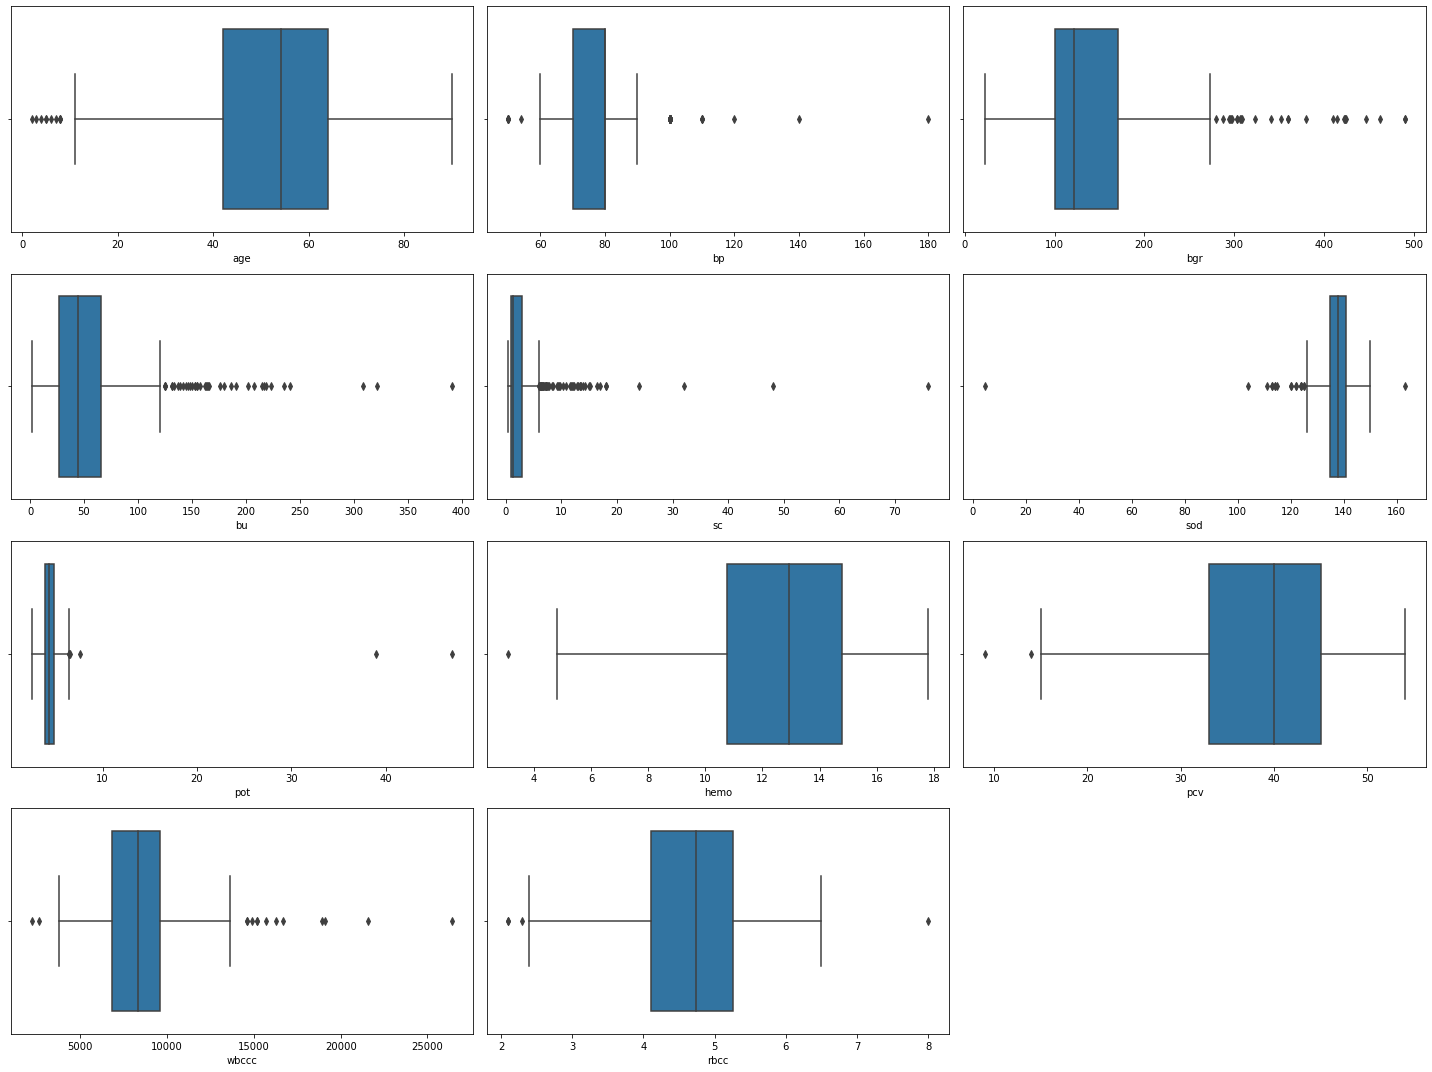

In [55]:
plt.figure(figsize=(20,15))
j=1
for i in df1_num.columns:
    plt.subplot(4,3,j)
    sns.boxplot(x=df1_num[i])
    j=j+1
    plt.tight_layout()

In [56]:
#Outlier Treatment for Sod and Pot columns
#Capping the outliers with IQR method

df1_ot=df1_num[['sod', 'pot']]

for i in df1_ot.columns:
    q1=df1_ot[i].quantile(0.25)
    q3=df1_ot[i].quantile(0.75)
    iqr=q3-q1
    ub=q3 + 1.5*iqr
    lb=q1 - 1.5*iqr
    uc=df1_ot[i].quantile(0.99)
    lc=df1_ot[i].quantile(0.01)
    for ind1 in df1_ot[i].index:
        if df1_ot.loc[ind1, i] >ub:            
            df1_ot.loc[ind1, i] =uc
        if df1_ot.loc[ind1, i] < lb:
            df1_ot.loc[ind1, i] =lc

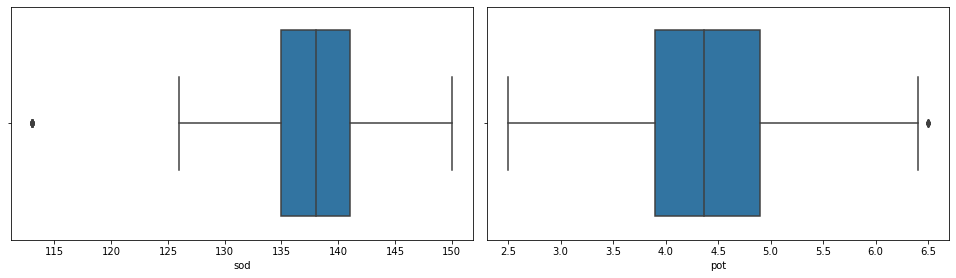

In [57]:
#Box plot after outlier treatment

plt.figure(figsize=(20,15))
j=1
for i in df1_ot.columns:
    plt.subplot(4,3,j)
    sns.boxplot(x=df1_ot[i])
    j=j+1
    plt.tight_layout()

#### Summary of Outliers Treatment

1. Domain Knowledge plays an important role in identifying the outliers in medical related datasets.
2. After careful and thoughtful reseach on each features we found out that outliers exists in only two variables.
3. For example, in blood glucose random(bgr) some outliers are detected that reached 500mg/dl. However, the highest blood glucose level recorded in 2008 for a surviving patient reached 2656 mg/dl.
4. For age variable, the data shows that it is colleted for age group from 2 years children to 90 years old.
5. For Blood Pressure(bp) feature, values from 50 mm/Hg to 180mm/Hg are considered legitimate values.
6. Similarly for Blood Urea(bu), Serum Creatinin(sc), Hemoglobin(hemo), Packed Cell Volume(pcv), White Blood cell count(wbccc) and Red Blood Cell count(rbcc) all have their respective values which are considered legitimate in this dataset.
7. For potassium, three extreme data points are unacceptable. The highest potassium level observed was 7.6 mEq/L. This means that a potassium level with 39 and 47, as shown above is impossible and usually due to a mistake.
8. Similarly, with sodium, as shown, one extreme data point was detected, which is 4.5. Normally, sodium level should be between 135 and 145 mEq/L, and if it is less than 135, then the patient suffers from hyponatremia. For this reason, a value of 4.5 is unacceptable or impossible.
9. Hence outlier treatment is done only on sod and pot varaibles only. 

In [58]:
dfv2=pd.concat([df1_ot, dfv1.drop(['sod', 'pot'], axis=1)], axis=1)
dfv2.head(2)

,sod,pot,age,bp,bgr,bu,sc,hemo,pcv,wbccc,rbcc,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,138.8,4.3,48.0,80.0,121.0,36.0,1.2,15.4,44.0,7800.0,5.20,1.02,1.0,0.0,0.2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,137.4,4.0,7.0,50.0,113.0,18.0,0.8,11.3,38.0,6000.0,4.96,1.02,4.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [59]:
inp=dfv2.drop(['class'], 1)
out=dfv2['class']

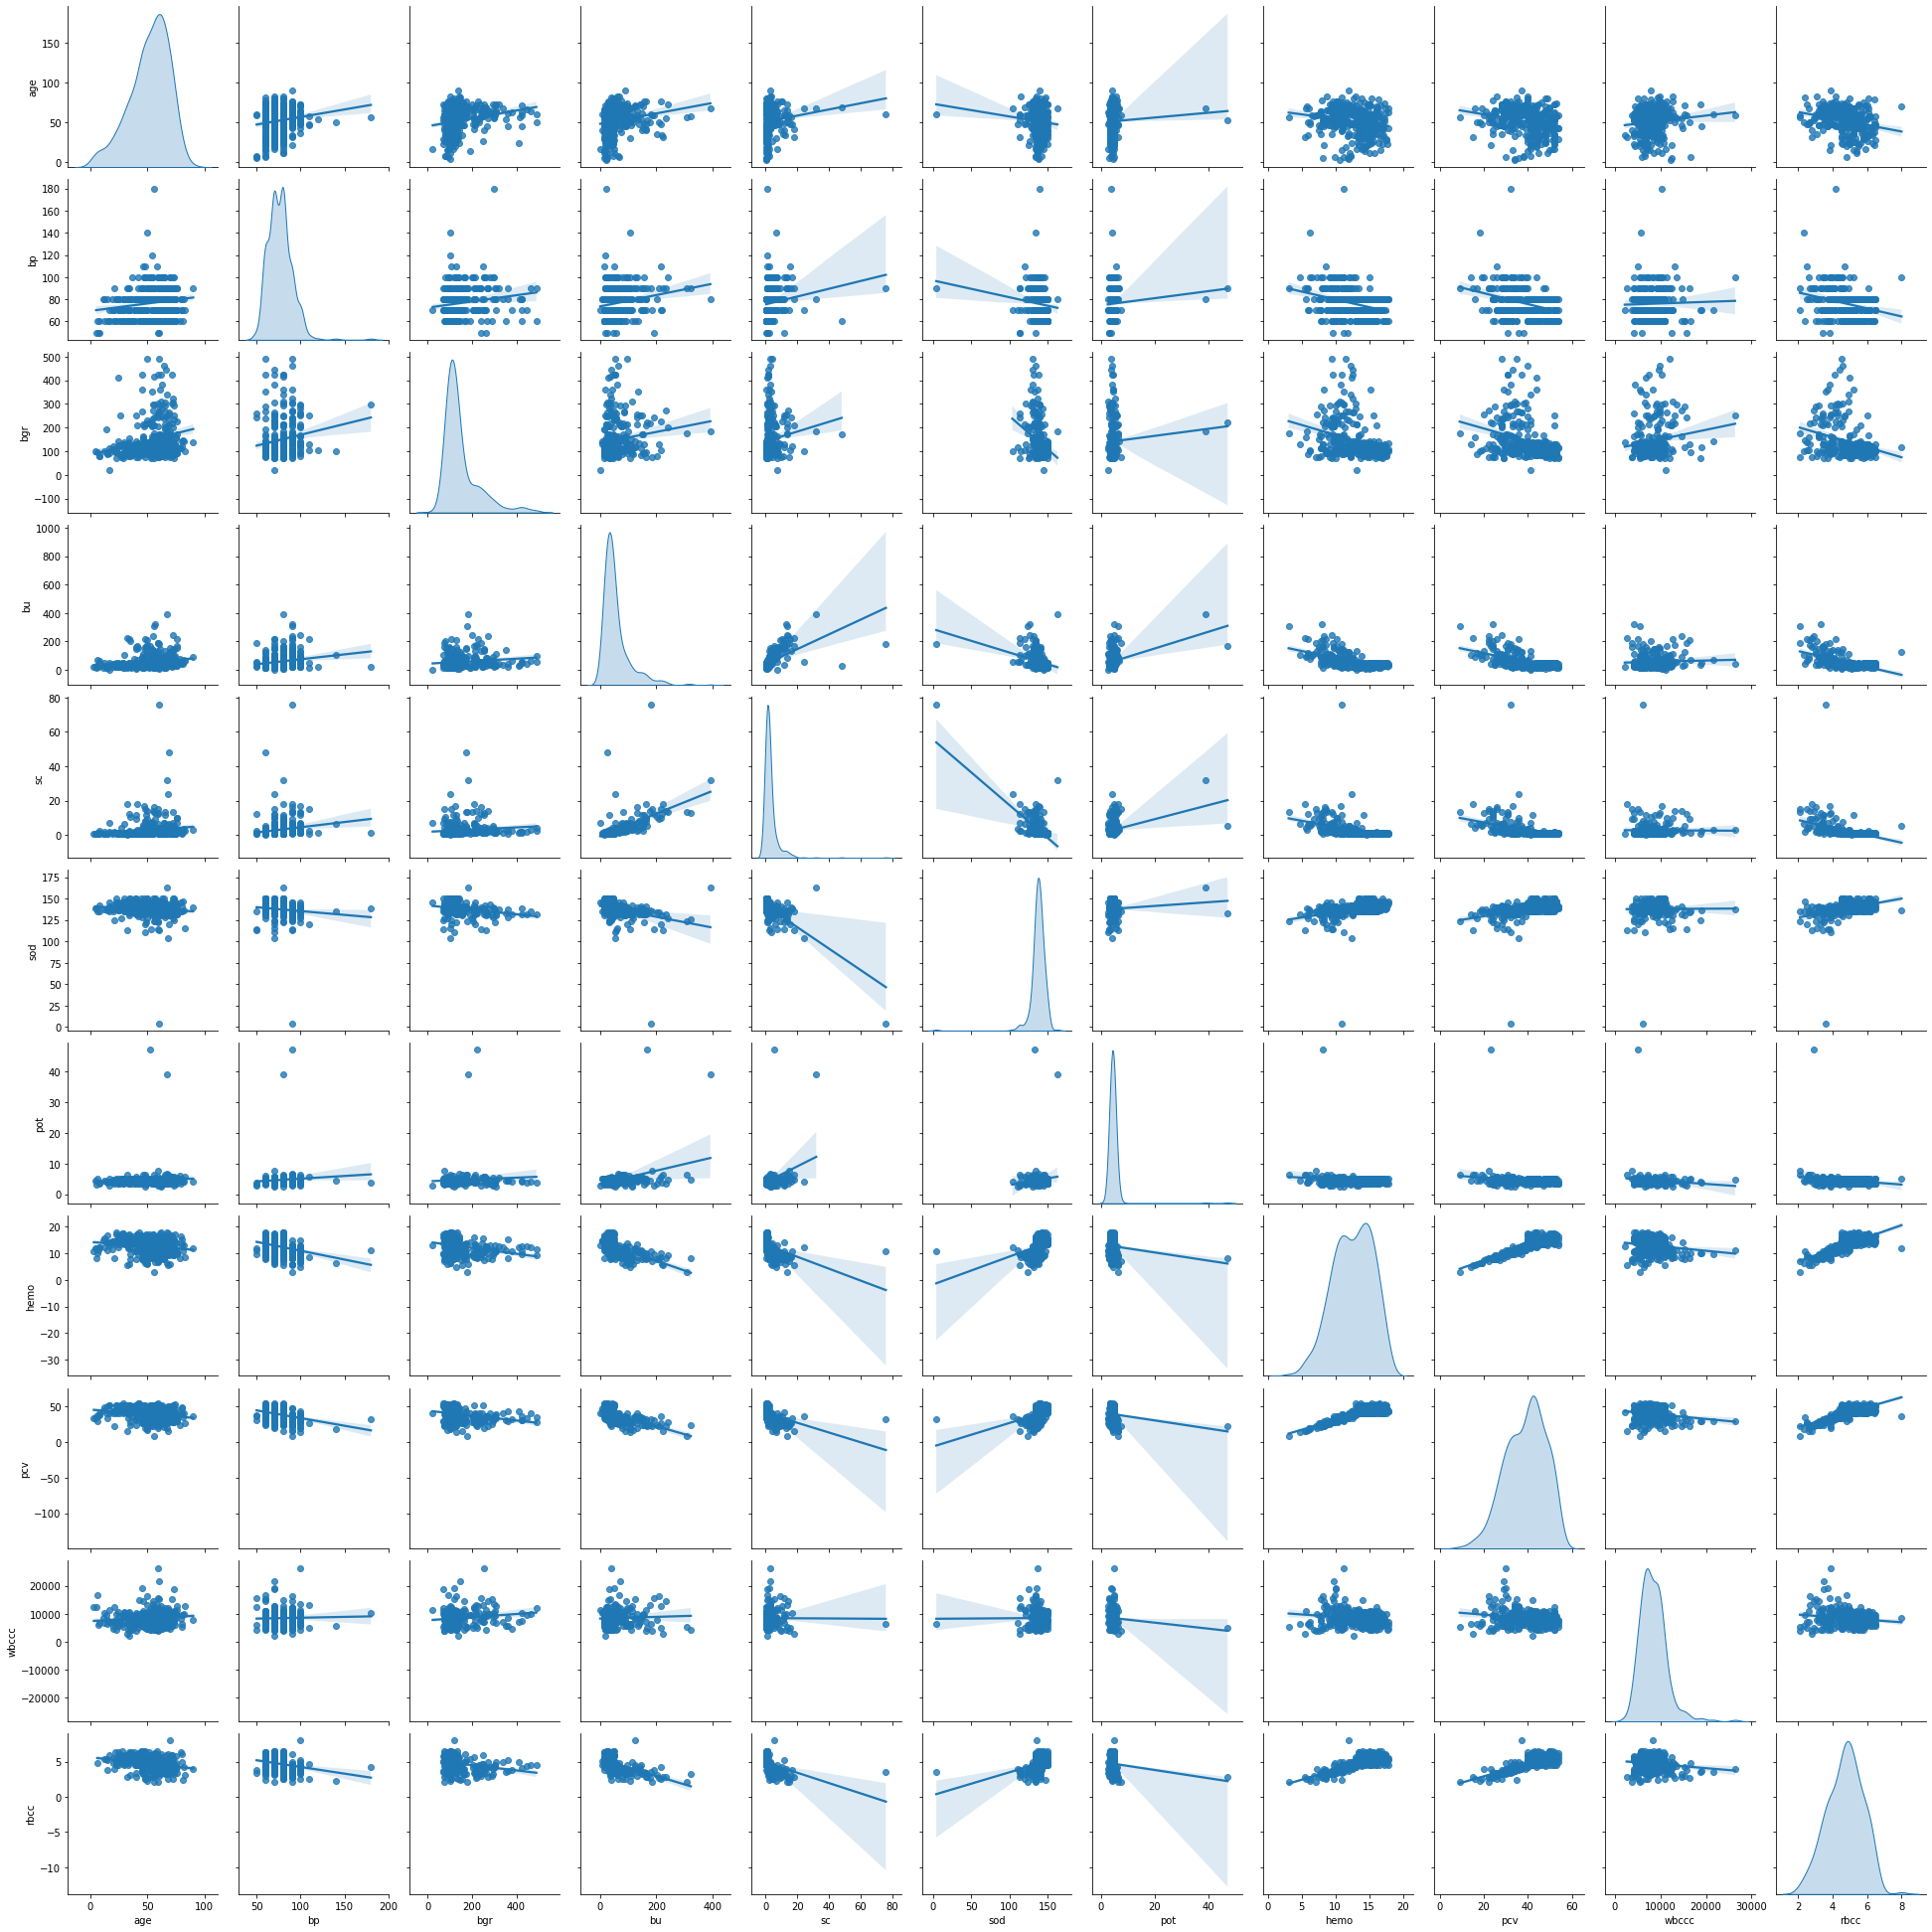

In [60]:
sns.pairplot(df_num, kind='reg', diag_kind='kde')
plt.show()

<a id="selection"></a>
### Fearture Selection for logistic Regression

In [61]:
anovaDF=pd.DataFrame(f_classif(inp, out),columns=inp.columns).T.rename(columns={0:'f-statistic',1:'p-value'})
anovaDF

,f-statistic,p-value
sod,92.035949,9.586428e-20
pot,1.532087,2.165292e-01
age,20.365971,8.432607e-06
bp,31.910549,3.078310e-08
bgr,81.686443,7.033811e-18
bu,64.373743,1.165433e-14
sc,37.921412,1.801996e-09
hemo,424.323562,1.065647e-64
pcv,330.978939,2.939931e-54
wbccc,20.553724,7.681545e-06


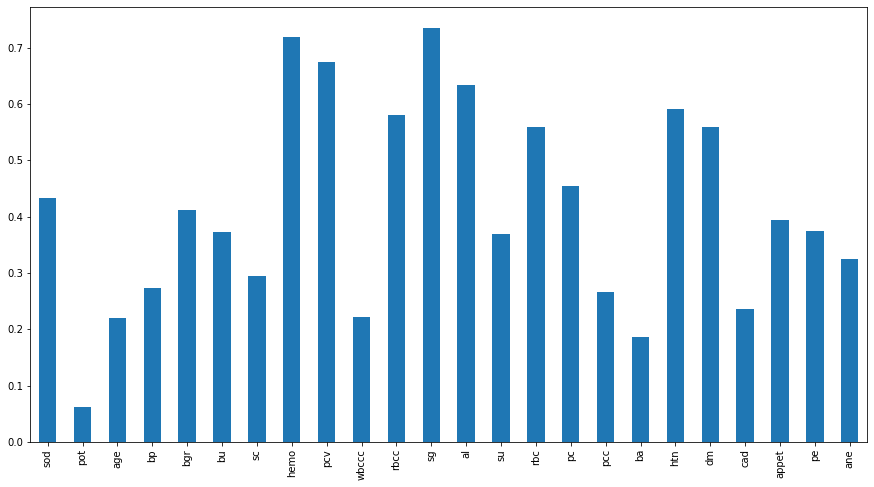

In [62]:
# corelation of the features with the target variable
ser=dfv2.corr(method ='pearson')['class']
ser.drop('class',inplace=True)

ser.abs().plot.bar(figsize=(15,8));

plt.show(block=True)

In [63]:
pcor=dfv2.corr(method ='pearson')['class'].abs()
pcor.shape

(25,)

In [64]:
pcor=pcor.drop('class')

In [65]:
pcor

sod      0.433376
pot      0.061925
age      0.220635
bp       0.272445
bgr      0.412664
bu       0.373128
sc       0.294943
hemo     0.718335
pcv      0.673818
wbccc    0.221600
rbcc     0.581309
sg       0.735383
al       0.633001
su       0.368479
rbc      0.558793
pc       0.455056
pcc      0.265313
ba       0.186871
htn      0.590438
dm       0.559060
cad      0.236088
appet    0.393341
pe       0.375154
ane      0.325396
Name: class, dtype: float64

In [66]:
strongCor=list(pcor[pcor>.4].index)
strongCor

['sod', 'bgr', 'hemo', 'pcv', 'rbcc', 'sg', 'al', 'rbc', 'pc', 'htn', 'dm']

<AxesSubplot:>

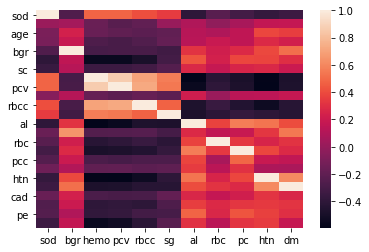

In [67]:
sns.heatmap(inp.corr(method ='pearson')[strongCor])

In [68]:
inp.corr(method ='pearson')[strongCor].abs()

,sod,bgr,hemo,pcv,rbcc,sg,al,rbc,pc,htn,dm
sod,1.000000,0.260263,0.478136,0.479400,0.408968,0.348116,0.399407,0.232299,0.308022,0.374013,0.341170
pot,0.018975,0.057046,0.162835,0.227136,0.190365,0.015608,0.099007,0.021202,0.070542,0.167815,0.177685
age,0.102142,0.239394,0.164590,0.201002,0.215590,0.194384,0.127538,0.091041,0.154155,0.387244,0.355778
bp,0.107200,0.186851,0.267251,0.293947,0.257232,0.181538,0.133322,0.195037,0.157219,0.281691,0.233002
bgr,0.260263,1.000000,0.298338,0.291539,0.289949,0.324056,0.315141,0.223133,0.280687,0.390310,0.514470
bu,0.395554,0.156685,0.553181,0.552022,0.482647,0.313518,0.432504,0.237053,0.385681,0.383228,0.302158
sc,0.352157,0.125601,0.338922,0.344445,0.320191,0.244910,0.272985,0.182552,0.253078,0.272817,0.201689
hemo,0.478136,0.298338,1.000000,0.867243,0.706670,0.564833,0.588087,0.423944,0.485891,0.586079,0.471448
pcv,0.479400,0.291539,0.867243,1.000000,0.729557,0.548151,0.553268,0.398716,0.475008,0.594229,0.468086
wbccc,0.053858,0.120128,0.175620,0.210939,0.172306,0.212158,0.219974,0.019721,0.139966,0.145544,0.179678


In [69]:
def selectHighCorr(data,treshold):
    corr_col=set()
    corrmat=data.corr(method ='pearson')
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i,j])>treshold:
                colname=corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [70]:
selectHighCorr(inp,.6)

{'dm', 'pcv', 'rbcc', 'su'}

<a id="scale"></a>
### Scaling and Splitting for train and test dataset

In [71]:
sc=StandardScaler()
inp_sc=sc.fit_transform(inp)
inp_sc=pd.DataFrame(inp_sc, columns=inp.columns, index=inp.index)
inp_sc.head(2)

,sod,pot,age,bp,bgr,bu,sc,hemo,pcv,wbccc,rbcc,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,0.171949,-0.122326,-0.203389,0.274543,-0.365435,-0.438173,-0.333460,1.029280,0.602511,-0.250497,0.564886,0.510781,-0.048432,-0.475705,-0.134896,-0.587474,-0.342518,-0.241249,1.311903,1.385535,-0.304789,-0.507801,-0.484322,-0.420084
1,-0.026836,-0.555775,-2.616277,-1.930625,-0.470103,-0.801400,-0.404567,-0.456652,-0.114124,-0.944767,0.298927,0.510781,2.257874,-0.475705,0.451607,-0.587474,-0.342518,-0.241249,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084


In [72]:
xtrain, xtest, ytrain, ytest=train_test_split(inp_sc, out, test_size=0.3, random_state=99)

<a id="logit_stats"></a>
### Logistic Regression (Stats Model)

In [73]:
inp_sc_logit=inp_sc[['dm', 'pcv', 'rbcc', 'su']]

In [74]:
inpc=sm.add_constant(inp_sc_logit)

In [75]:
xtrain_logit, xtest_logit, ytrain_logit, ytest_logit=train_test_split(inpc, out, test_size=0.3,random_state=1)

In [76]:
mod=sm.Logit(ytrain_logit,xtrain_logit)
logr=mod.fit()
print(logr.summary())

         Current function value: 0.186057
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  280
Model:                          Logit   Df Residuals:                      275
Method:                           MLE   Df Model:                            4
Date:                Sat, 05 Jun 2021   Pseudo R-squ.:                  0.7145
Time:                        12:48:25   Log-Likelihood:                -52.096
converged:                      False   LL-Null:                       -182.49
Covariance Type:            nonrobust   LLR p-value:                 3.079e-55
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.2229   4.24e+05      0.000      1.000    -8.3e+05    8.31e+05
dm             2.9722      2.193      1.355      0.175      -1.32

C:\Users\jayanth.k\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<a id=sklearn></a>
### Logistic Regression (Linear Model from ScikitLearn)

In [77]:
xtrain, xtest, ytrain, ytest=train_test_split(inp_sc, out, test_size=0.3, random_state=1)

In [78]:
mod=LogisticRegression()
mod.fit(xtrain,ytrain)
ypred=mod.predict(xtest)
ypred

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       0.])

In [79]:
yprob=mod.predict_proba(xtest)
yprob[:10]#first 10 values. (1-p) and p values

array([[9.95867992e-01, 4.13200754e-03],
       [4.13338559e-06, 9.99995867e-01],
       [9.54750396e-01, 4.52496036e-02],
       [9.35050109e-01, 6.49498909e-02],
       [1.43875613e-04, 9.99856124e-01],
       [9.94718790e-01, 5.28121031e-03],
       [7.15753860e-07, 9.99999284e-01],
       [9.81523531e-01, 1.84764687e-02],
       [6.47967592e-05, 9.99935203e-01],
       [9.98769314e-01, 1.23068601e-03]])

In [80]:
mod.coef_

array([[-0.3449789 ,  0.02242725, -0.12730544,  0.67891115,  0.78295763,
         0.03267345,  0.65476011, -1.44071673, -0.95143342,  0.04697363,
        -0.53289461, -1.53781898,  1.19109748,  0.37359966,  1.26940628,
         0.32452608,  0.09886727,  0.01170339,  0.687401  ,  0.77475808,
         0.00567756,  0.54421258,  0.53215656,  0.22538353]])

In [81]:
mod.intercept_

array([4.69025183])

In [82]:
mod1=LogisticRegression(C=1000000000000)
mod1.fit(xtrain,ytrain)
ypred=mod1.predict(xtest)
ypred

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       0.])

In [83]:
mod1.coef_

array([[  2.94015425,  -1.79131385,  -2.11498578,   5.86020434,
         10.37077863,  -5.97451339,   7.71135398, -13.36392509,
         -5.45738712,  -0.42172936,  -7.54907588,  -8.95601236,
          9.70352083,  -0.60352957,   8.69787737,  -1.63001297,
         -0.73377156,  -4.0425311 ,   3.88238526,   6.15434364,
         -7.4000635 ,   4.75937322,   3.34734191,   0.06474848]])

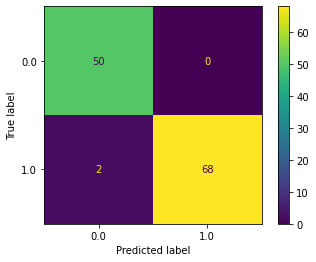

In [84]:
plot_confusion_matrix(mod1,xtest,ytest)
plt.show()

In [85]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(mod1, xtest, ytest, cv=5, scoring='f1')
score

array([1.        , 1.        , 0.92307692, 0.92307692, 0.92307692])

In [86]:
np.mean(score), np.std(score)/np.mean(score)

(0.9538461538461538, 0.03950789907714807)

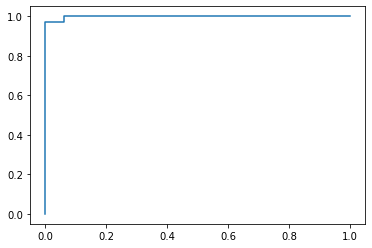

In [87]:
yprob=mod1.predict_proba(xtest)
yprob=yprob[:,1] #Consider only 2nd column
fpr, tpr, th=roc_curve(ytest, yprob)
plt.plot(fpr, tpr)
plt.show()

In [88]:
roc_auc_score(ytest, yprob)

0.9982857142857142

In [89]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(ytest, ypred)

0.9659090909090909

In [90]:
ypred_th=np.zeros([len(ytest),1])
ypred_th[yprob>0.3]=1  

In [91]:
print(classification_report(ytest, ypred_th,digits=4))

              precision    recall  f1-score   support

         0.0     0.9615    1.0000    0.9804        50
         1.0     1.0000    0.9714    0.9855        70

    accuracy                         0.9833       120
   macro avg     0.9808    0.9857    0.9829       120
weighted avg     0.9840    0.9833    0.9834       120



#### Check with different threshold values

In [92]:
th1=[0.1,0.2,0.3,0.4,0.6,0.7,0.8,0.9]  #Defining different prob values

In [93]:
acc=[]
rec=[]
pre=[]
f1=[]
for i in th1:
    ypred_th=np.zeros([len(ytest),1])
    ypred_th[yprob>i]=1
    acc.append(accuracy_score(ytest, ypred_th))
    rec.append(recall_score(ytest, ypred_th))
    pre.append(precision_score(ytest, ypred_th))
    f1.append(f1_score(ytest, ypred_th))

In [94]:
res=pd.DataFrame()
res['Threshold']=th1
res['Accuracy']=acc
res['Recall']=rec
res['Precision']=pre
res['F1_score']=f1
res

,Threshold,Accuracy,Recall,Precision,F1_score
0,0.1,0.983333,0.971429,1.0,0.985507
1,0.2,0.983333,0.971429,1.0,0.985507
2,0.3,0.983333,0.971429,1.0,0.985507
3,0.4,0.983333,0.971429,1.0,0.985507
4,0.6,0.975000,0.957143,1.0,0.978102
5,0.7,0.975000,0.957143,1.0,0.978102
6,0.8,0.975000,0.957143,1.0,0.978102
7,0.9,0.975000,0.957143,1.0,0.978102


#### Youden Index method of choosing the threshold for which threshold the (TPR-FPR) is maximum. This model is considered as the best model.

In [95]:
fpr, tpr, th=roc_curve(ytest, yprob)

res1=pd.DataFrame({
    'Threshold':th, 'TPR':tpr, 'FPR':fpr
})

res1['TPR-FPR']=res1['TPR']-res1['FPR']
res1.sort_values('TPR-FPR', ascending=False)

,Threshold,TPR,FPR,TPR-FPR
2,5.514473e-01,0.971429,0.00,0.971429
4,1.610105e-07,1.000000,0.06,0.940000
3,5.952556e-05,0.971429,0.06,0.911429
1,1.000000e+00,0.700000,0.00,0.700000
0,2.000000e+00,0.000000,0.00,0.000000
5,2.824195e-27,1.000000,1.00,0.000000


In [96]:
def rocauc_curve(df,prediction):
    tpr,fpr,th=roc_curve(df,prediction)
    auc_score=roc_auc_score(df,prediction)
    plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %auc_score)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend()
    plt.show()

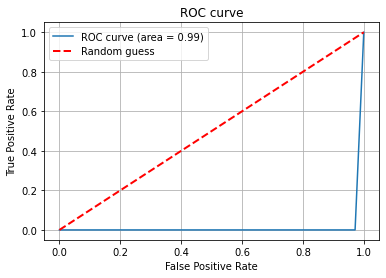

In [97]:
rocauc_curve(ytest,ypred)

<a id="knn"></a>
### KNN Algorithm / Model

In [98]:
xtrain, xtest, ytrain, ytest=train_test_split(inp_sc, out, test_size=0.3, random_state=1)

In [99]:
knn=KNeighborsClassifier()
knn.fit(xtrain, ytrain)
ypred=knn.predict(xtest)
ypred[:10]

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0.])

In [100]:
print("KNN Model Metrics Report")
print(classification_report(ytest, ypred,digits=4))

KNN Model Metrics Report
              precision    recall  f1-score   support

         0.0     0.9259    1.0000    0.9615        50
         1.0     1.0000    0.9429    0.9706        70

    accuracy                         0.9667       120
   macro avg     0.9630    0.9714    0.9661       120
weighted avg     0.9691    0.9667    0.9668       120



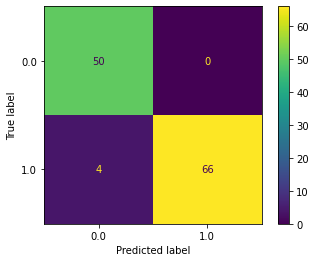

In [101]:
plot_confusion_matrix(knn,xtest,ytest)
plt.show()

In [102]:
score=cross_val_score(knn, inp, out, cv=5, scoring='f1')
score

array([0.65882353, 0.70454545, 0.68085106, 0.65909091, 0.64444444])

In [103]:
#Mean and Variance score to check overfittinga and underfitting nature
np.mean(score)*100, np.std(score)/np.mean(score)*100

(66.95510802644719, 3.137947601925297)

In [104]:
mean_sc=[]
var_sc=[]
k=np.arange(1,11)
for k1 in k:
    knn_mod=KNeighborsClassifier(n_neighbors=k1)
    score=cross_val_score(knn_mod, inp, out, cv=5, scoring='f1')
    mean_sc.append(np.mean(score))
    var_sc.append(np.std(score)/np.mean(score))

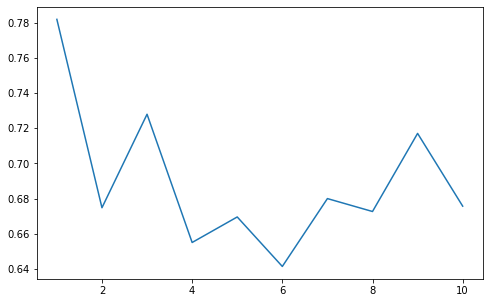

In [105]:
plt.figure(figsize=(8,5))
plt.plot(k,mean_sc)
plt.show()

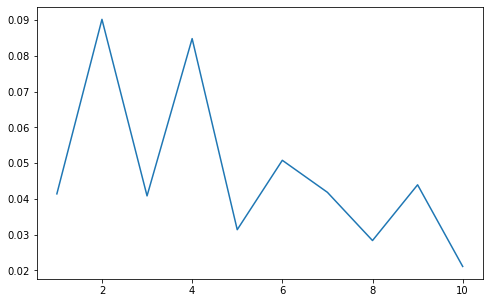

In [106]:
plt.figure(figsize=(8,5))
plt.plot(k,var_sc)
plt.show()

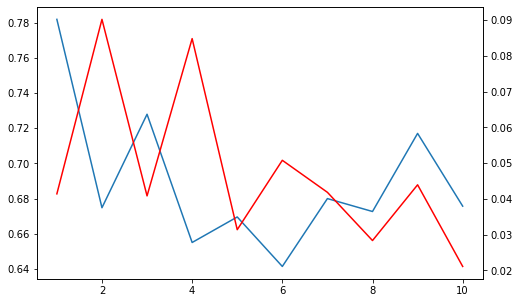

In [107]:
plt.figure(figsize=(8,5))
plt.plot(k,mean_sc)
plt.twinx()
plt.plot(k,var_sc,color='red')
plt.show()

In [108]:
KNN_mod=KNeighborsClassifier()
params={'n_neighbors': [3,5,7,9,11,13],
       'p':[1,3,4,5,6,7],
       'weights':['uniform', 'distance']}

In [109]:
hyp_mod=GridSearchCV(KNN_mod, param_grid=params, scoring='f1')

In [110]:
tun_mod=hyp_mod.fit(xtrain, ytrain)

In [111]:
tun_mod.best_params_

{'n_neighbors': 3, 'p': 5, 'weights': 'uniform'}

In [112]:
tun_mod.best_score_

0.9858350100603621

In [113]:
res=pd.DataFrame(tun_mod.cv_results_)
res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002401,0.000794,0.005584,0.000804,3,1,uniform,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}",0.941176,1.0,0.985915,0.985915,0.971429,0.976887,0.020011,16
1,0.002394,0.000488,0.003391,0.000489,3,1,distance,"{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}",0.941176,1.0,0.985915,0.985915,0.971429,0.976887,0.020011,16
2,0.002406,0.000483,0.013555,0.001198,3,3,uniform,"{'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}",0.956522,1.0,0.985915,0.985915,0.985915,0.982854,0.014251,7
3,0.002194,0.000400,0.011370,0.000488,3,3,distance,"{'n_neighbors': 3, 'p': 3, 'weights': 'distance'}",0.956522,1.0,0.985915,0.985915,0.985915,0.982854,0.014251,7
4,0.056039,0.107597,0.013173,0.000394,3,4,uniform,"{'n_neighbors': 3, 'p': 4, 'weights': 'uniform'}",0.956522,1.0,0.985915,0.985915,0.985915,0.982854,0.014251,7


In [114]:
res.sort_values('std_test_score', ascending=True).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
21,0.002186,0.000403,0.011378,0.000482,5,6,distance,"{'n_neighbors': 5, 'p': 6, 'weights': 'distance'}",0.971429,0.985915,0.985915,0.971429,0.985915,0.980121,0.007097,11
11,0.002175,0.000406,0.011383,0.000480,3,7,distance,"{'n_neighbors': 3, 'p': 7, 'weights': 'distance'}",0.971429,1.000000,0.985915,0.985915,0.985915,0.985835,0.009036,1
9,0.002004,0.000016,0.011359,0.000477,3,6,distance,"{'n_neighbors': 3, 'p': 6, 'weights': 'distance'}",0.971429,1.000000,0.985915,0.985915,0.985915,0.985835,0.009036,1
8,0.002196,0.000399,0.012964,0.000023,3,6,uniform,"{'n_neighbors': 3, 'p': 6, 'weights': 'uniform'}",0.971429,1.000000,0.985915,0.985915,0.985915,0.985835,0.009036,1
7,0.002388,0.000478,0.011566,0.000488,3,5,distance,"{'n_neighbors': 3, 'p': 5, 'weights': 'distance'}",0.971429,1.000000,0.985915,0.985915,0.985915,0.985835,0.009036,1
6,0.002200,0.000416,0.012958,0.000030,3,5,uniform,"{'n_neighbors': 3, 'p': 5, 'weights': 'uniform'}",0.971429,1.000000,0.985915,0.985915,0.985915,0.985835,0.009036,1
10,0.001995,0.000005,0.013163,0.000400,3,7,uniform,"{'n_neighbors': 3, 'p': 7, 'weights': 'uniform'}",0.971429,1.000000,0.985915,0.985915,0.985915,0.985835,0.009036,1
23,0.002202,0.000398,0.011747,0.000410,5,7,distance,"{'n_neighbors': 5, 'p': 7, 'weights': 'distance'}",0.956522,0.985915,0.971429,0.971429,0.985915,0.974242,0.010976,18
20,0.002003,0.000029,0.012957,0.000027,5,6,uniform,"{'n_neighbors': 5, 'p': 6, 'weights': 'uniform'}",0.956522,0.985915,0.985915,0.971429,0.985915,0.977139,0.011737,12
16,0.001982,0.000017,0.012972,0.000029,5,4,uniform,"{'n_neighbors': 5, 'p': 4, 'weights': 'uniform'}",0.956522,0.985915,0.985915,0.971429,0.985915,0.977139,0.011737,12


In [115]:
final_knn=KNeighborsClassifier(n_neighbors=3, p=5, weights='uniform')

In [116]:
final_knn.fit(xtrain, ytrain)
ypred=final_knn.predict(xtest)
print(classification_report(ytest, ypred,digits=4))

              precision    recall  f1-score   support

         0.0     0.9259    1.0000    0.9615        50
         1.0     1.0000    0.9429    0.9706        70

    accuracy                         0.9667       120
   macro avg     0.9630    0.9714    0.9661       120
weighted avg     0.9691    0.9667    0.9668       120



From Pandas Profiling report, class is highly correlated with few varaibles such as pc, dm, rbc, al, sg, pcv, sc, sod, htn, pot, pe, ane, appet, rbcc. So prepare logit model with these values and do further analysis.

In [117]:
cohen_kappa_score(ytest, ypred)

0.9322033898305084

<b style='color:teal'>Interpretation:</b> As the kappa score for the model (with cut-off probability 0.5) is 0.9154, we can say that there is almost perfect agreement between the actual and predicted values.

In [118]:
yprob=final_knn.predict_proba(xtest)
yprob=yprob[:,1]

In [119]:
roc_auc_score(ytest, yprob)

0.9785714285714286

<a id="naive"></a>
### Naive Baye's Algorithm

In [120]:
xtrain, xtest, ytrain, ytest=train_test_split(inp_sc, out, test_size=0.3, random_state=1)

In [121]:
modGB=GaussianNB()
modGB.fit(xtrain, ytrain)
ypred=modGB.predict(xtest)
ypred

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       0.])

In [122]:
print(classification_report(ytest, ypred,digits=4))

              precision    recall  f1-score   support

         0.0     0.9804    1.0000    0.9901        50
         1.0     1.0000    0.9857    0.9928        70

    accuracy                         0.9917       120
   macro avg     0.9902    0.9929    0.9915       120
weighted avg     0.9918    0.9917    0.9917       120



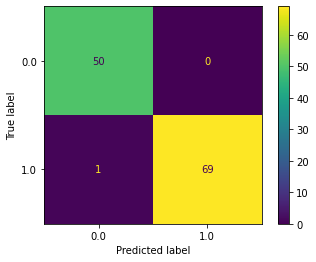

In [123]:
plot_confusion_matrix(modGB,xtest,ytest)
plt.show()

In [124]:
ypred_train=modGB.predict(xtrain)
ypred_test=modGB.predict(xtest)

In [125]:
print("Performance of train model", f1_score(ytrain, ypred_train))
print("Performance of test model", f1_score(ytest, ypred_test))

Performance of train model 0.9944134078212291
Performance of test model 0.9928057553956835


#### Since the difference between train and test performance is very less, model is not overfitting. 

In [126]:
score=cross_val_score(modGB, inp, out, cv=5, scoring='f1')
np.mean(score), np.std(score)/np.mean(score) 

(0.9770587182241318, 0.021909047269008598)

In [127]:
modGB.fit(xtrain,ytrain)
ypred_prob=modGB.predict_proba(xtest)
ypred=modGB.predict(xtest)

In [128]:
ypred_prob=ypred_prob[:,1]

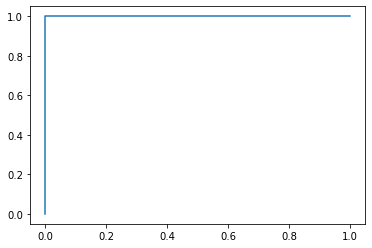

In [129]:
fpr, tpr, th=roc_curve(ytest, ypred_prob)
plt.plot(fpr, tpr)
plt.show()

In [130]:
roc_auc_score(ytest, ypred_prob)

1.0

In [131]:
cohen_kappa_score(ytest, ypred)

0.9829059829059829

In [132]:
ypred_th=np.zeros([len(ytest),1])
ypred_th[ypred_prob>0.1]=1  


print(classification_report(ytest, ypred_th,digits=4))

              precision    recall  f1-score   support

         0.0     0.9804    1.0000    0.9901        50
         1.0     1.0000    0.9857    0.9928        70

    accuracy                         0.9917       120
   macro avg     0.9902    0.9929    0.9915       120
weighted avg     0.9918    0.9917    0.9917       120



<a id="svm"></a>
### Support Vector Machine

In [133]:
data=pd.concat([inp_sc, out], axis=1)
data.head(2)

,sod,pot,age,bp,bgr,bu,sc,hemo,pcv,wbccc,rbcc,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,0.171949,-0.122326,-0.203389,0.274543,-0.365435,-0.438173,-0.333460,1.029280,0.602511,-0.250497,0.564886,0.510781,-0.048432,-0.475705,-0.134896,-0.587474,-0.342518,-0.241249,1.311903,1.385535,-0.304789,-0.507801,-0.484322,-0.420084,1.0
1,-0.026836,-0.555775,-2.616277,-1.930625,-0.470103,-0.801400,-0.404567,-0.456652,-0.114124,-0.944767,0.298927,0.510781,2.257874,-0.475705,0.451607,-0.587474,-0.342518,-0.241249,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,1.0


In [134]:
classifier = SVC(kernel='rbf', random_state = 1)

In [135]:
classifier.fit(xtrain,ytrain)

SVC(random_state=1)

In [136]:
ypred=classifier.predict(xtest)

In [137]:
print(classification_report(ytest,ypred,digits=4))

              precision    recall  f1-score   support

         0.0     0.9434    1.0000    0.9709        50
         1.0     1.0000    0.9571    0.9781        70

    accuracy                         0.9750       120
   macro avg     0.9717    0.9786    0.9745       120
weighted avg     0.9764    0.9750    0.9751       120



In [138]:
cm=confusion_matrix(ytest,ypred)

In [139]:
print(cm)

[[50  0]
 [ 3 67]]


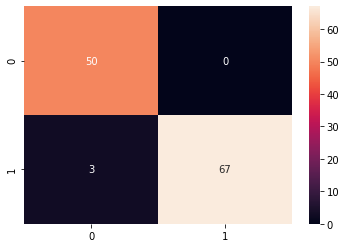

In [140]:
sns.heatmap(confusion_matrix(ytest, ypred), annot=True)
plt.show()

In [141]:
classifier.support_vectors_

array([[ 0.48432614,  0.74457094,  1.6798412 , ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [ 0.20034717, -1.56715543, -1.32155668, ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [ 1.76223152,  0.60008804, -0.08568697, ..., -0.50780078,
        -0.4843221 , -0.42008403],
       ...,
       [ 0.37073455, -0.6135683 ,  0.73822618, ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [ 0.20034717,  0.39781199, -1.91006607, ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [-0.36761078,  0.45560515,  1.3855865 , ...,  1.96927621,
         2.0647416 , -0.42008403]])

In [142]:
classifier = SVC(random_state=1)
kf=KFold(n_splits=5, shuffle=True, random_state=1)
params={'C': [0,1,2,3,4],
       'kernel':['linear','rbf','sigmoid'],
       'gamma' : ['scale', 'auto'],
        'degree':[ 2,3,4,5,6,7,8,9,10]
       }


hyp_mod=GridSearchCV(classifier, param_grid=params, scoring='f1',cv=kf)
tun_mod=hyp_mod.fit(xtrain, ytrain)
res=pd.DataFrame(tun_mod.cv_results_)
res
res.sort_values('std_test_score', ascending=True).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
161,0.002793,3.988981e-04,0.001995,1.168008e-07,2,10,auto,sigmoid,"{'C': 2, 'degree': 10, 'gamma': 'auto', 'kerne...",0.970588,0.984615,1.0,0.986301,1.0,0.988301,0.011001,91
158,0.002992,8.449576e-07,0.002593,4.885388e-04,2,10,scale,sigmoid,"{'C': 2, 'degree': 10, 'gamma': 'scale', 'kern...",0.970588,0.984615,1.0,0.986301,1.0,0.988301,0.011001,91
86,0.002994,6.307698e-04,0.002392,4.912071e-04,1,7,scale,sigmoid,"{'C': 1, 'degree': 7, 'gamma': 'scale', 'kerne...",0.970588,0.984615,1.0,0.986301,1.0,0.988301,0.011001,91
155,0.002992,1.300638e-06,0.002393,4.876824e-04,2,9,auto,sigmoid,"{'C': 2, 'degree': 9, 'gamma': 'auto', 'kernel...",0.970588,0.984615,1.0,0.986301,1.0,0.988301,0.011001,91
152,0.003188,3.841548e-04,0.002390,4.860880e-04,2,9,scale,sigmoid,"{'C': 2, 'degree': 9, 'gamma': 'scale', 'kerne...",0.970588,0.984615,1.0,0.986301,1.0,0.988301,0.011001,91
92,0.002990,4.813458e-06,0.002593,4.883832e-04,1,8,scale,sigmoid,"{'C': 1, 'degree': 8, 'gamma': 'scale', 'kerne...",0.970588,0.984615,1.0,0.986301,1.0,0.988301,0.011001,91
95,0.002992,8.609519e-07,0.002992,6.307512e-04,1,8,auto,sigmoid,"{'C': 1, 'degree': 8, 'gamma': 'auto', 'kernel...",0.970588,0.984615,1.0,0.986301,1.0,0.988301,0.011001,91
149,0.003192,3.997106e-04,0.002393,4.892404e-04,2,8,auto,sigmoid,"{'C': 2, 'degree': 8, 'gamma': 'auto', 'kernel...",0.970588,0.984615,1.0,0.986301,1.0,0.988301,0.011001,91
98,0.002992,6.325960e-07,0.002593,4.885972e-04,1,9,scale,sigmoid,"{'C': 1, 'degree': 9, 'gamma': 'scale', 'kerne...",0.970588,0.984615,1.0,0.986301,1.0,0.988301,0.011001,91
146,0.003192,3.988990e-04,0.002196,3.972927e-04,2,8,scale,sigmoid,"{'C': 2, 'degree': 8, 'gamma': 'scale', 'kerne...",0.970588,0.984615,1.0,0.986301,1.0,0.988301,0.011001,91


In [143]:
res.iloc[161,:]['params']

{'C': 2, 'degree': 10, 'gamma': 'auto', 'kernel': 'sigmoid'}

In [144]:
final_svm=SVC(C=2, degree=10, gamma='auto',kernel='sigmoid',random_state=1)

In [145]:
final_svm.fit(xtrain,ytrain)
ypred=final_svm.predict(xtest)
print(classification_report(ytest,ypred,digits=4))

              precision    recall  f1-score   support

         0.0     0.9434    1.0000    0.9709        50
         1.0     1.0000    0.9571    0.9781        70

    accuracy                         0.9750       120
   macro avg     0.9717    0.9786    0.9745       120
weighted avg     0.9764    0.9750    0.9751       120



In [146]:
out.value_counts(normalize=True)

1.0    0.625
0.0    0.375
Name: class, dtype: float64

In [147]:
seed = 100
k = 5
sm1 = SMOTE(sampling_strategy='all', k_neighbors=k, random_state=seed)
x_bal, y_bal = sm1.fit_resample(inp_sc,out)

In [148]:
print(x_bal.shape)

(500, 24)


In [149]:
y_bal.shape

(500,)

In [150]:
xtrain_smote,xtest_smote,ytrain_smote,ytest_smote = train_test_split(x_bal,y_bal,test_size=0.3,
                                                                     random_state=1, stratify=y_bal)

In [151]:
final_svm=SVC(C=4, degree=3, gamma='auto',kernel='linear',random_state=1)
final_svm.fit(xtrain_smote,ytrain_smote)
ypred_smote=final_svm.predict(xtest_smote)

In [152]:
print(classification_report(ytest_smote,ypred_smote,digits=4))

              precision    recall  f1-score   support

         0.0     0.9740    1.0000    0.9868        75
         1.0     1.0000    0.9733    0.9865        75

    accuracy                         0.9867       150
   macro avg     0.9870    0.9867    0.9867       150
weighted avg     0.9870    0.9867    0.9867       150



In [153]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

In [154]:
final_svm.coef_.flatten()

array([-1.17259023e-01, -3.01239586e-01, -4.16556721e-02,  3.05487106e-01,
        7.01984091e-01, -1.70080263e-01,  1.28885616e-01, -4.33817090e-01,
       -4.25759598e-01,  1.43026911e-01, -6.05770431e-01, -1.03116056e+00,
        5.67017040e-01,  3.70912630e-16,  1.16182056e+00,  2.61405615e-16,
        2.13354800e-16,  7.52123695e-17,  2.09675831e-01,  2.13024298e-01,
        2.56548208e-16,  9.75466227e-01,  2.90843856e-01,  8.41677398e-02])

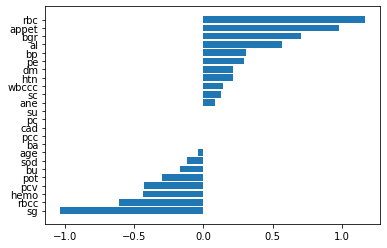

In [155]:
features_names=list(xtrain_smote.columns)
f_importances(final_svm.coef_.flatten(), features_names)

<a id="decision"></a>
### Decision Tree Algorithm

In [156]:
xtrain, xtest, ytrain, ytest=train_test_split(inp_sc, out, test_size=0.3, random_state=1)

In [157]:
out.value_counts(normalize=True)

1.0    0.625
0.0    0.375
Name: class, dtype: float64

In [158]:
ytrain.value_counts(normalize=True)

1.0    0.642857
0.0    0.357143
Name: class, dtype: float64

In [159]:
ytest.value_counts(normalize=True)

1.0    0.583333
0.0    0.416667
Name: class, dtype: float64

In [160]:
dt=DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
ypred=dt.predict(xtest)
ypred

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       0.])

In [161]:
print(classification_report(ytest, ypred,digits=4))

              precision    recall  f1-score   support

         0.0     0.9091    1.0000    0.9524        50
         1.0     1.0000    0.9286    0.9630        70

    accuracy                         0.9583       120
   macro avg     0.9545    0.9643    0.9577       120
weighted avg     0.9621    0.9583    0.9586       120



In [162]:
score=cross_val_score(dt, inp, out, cv=5, scoring='f1')
np.mean(score), np.std(score)/np.mean(score) 

(0.9877938309294848, 0.010261011841002473)

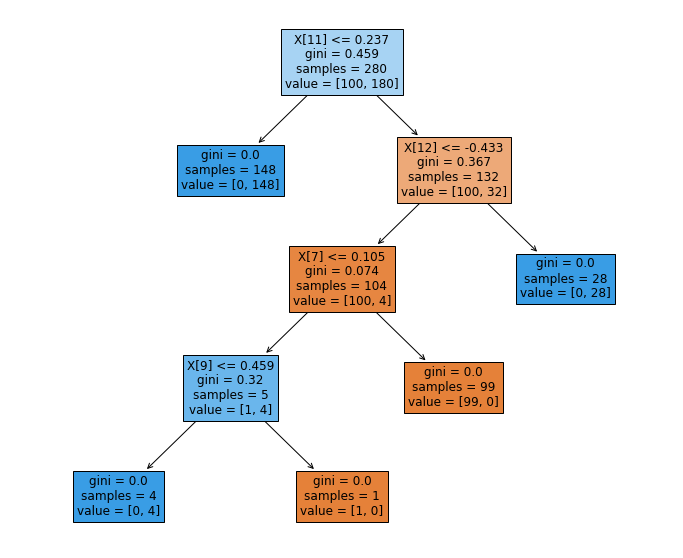

In [163]:
plt.figure(figsize=(12,10))
tree.plot_tree(dt, fontsize=12,filled = True)
plt.show()

In [164]:
dt.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.04738462, 0.        , 0.01244444,
       0.        , 0.62289562, 0.31727532, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [165]:
imp_features=pd.DataFrame({'feature':xtrain.columns, 'Importance_score':dt.feature_importances_})
imp_features.sort_values('Importance_score', ascending=False)

,feature,Importance_score
11,sg,0.622896
12,al,0.317275
7,hemo,0.047385
9,wbccc,0.012444
14,rbc,0.000000
22,pe,0.000000
21,appet,0.000000
20,cad,0.000000
19,dm,0.000000
18,htn,0.000000


In [166]:
kf = KFold(n_splits= 5, shuffle =True, random_state =99)
score =cross_val_score(dt,inp,out,cv = kf, scoring = "f1")
np.mean(score), np.std(score)/np.mean(score)

(0.9759454937090346, 0.020665935315609417)

In [167]:
# Tuning the model for the best max_depth
me_sc=[]
var_sc=[]
md=[1, 2, 3, 4, 5, 8, 10]
for k in md:
    dt_mod=DecisionTreeClassifier(max_depth=k, random_state=99)
    score=cross_val_score(dt_mod, inp, out, cv=5, scoring='f1')
    me_sc.append(np.mean(score))  #Underfitting indicator
    var_sc.append(np.std(score)/np.mean(score)) #Overfitting indicator

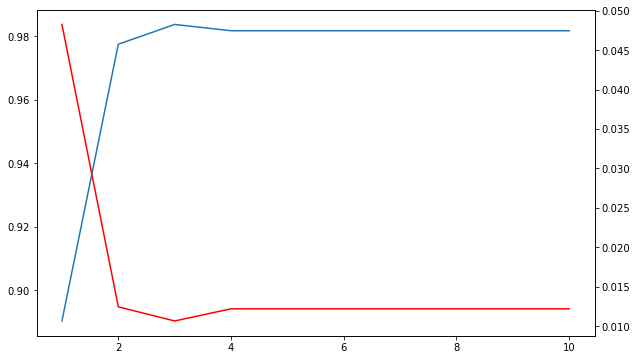

In [168]:
plt.figure(figsize=(10,6))
plt.plot(md,me_sc)
plt.twinx()
plt.plot(md,var_sc,color='red')
plt.show()

In [169]:
mod=DecisionTreeClassifier(random_state=99)  #Go to help section to see parameters name
kf=KFold(n_splits=5, shuffle=True, random_state=48) #Check for different random states and variation should be less than 5%
params={'max_depth':[1,2,3,4,5,8],
       'min_samples_split':[2,3,4,5,6,7, 8],
       'criterion':['gini', 'entropy']}
hyp_mod=GridSearchCV(mod, param_grid=params, scoring='f1', cv=kf)  #scoring selection depends on Domain application. IN covid model recall is better
tun_mod=hyp_mod.fit(xtrain, ytrain)

In [170]:
tun_mod.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}

In [171]:
res=pd.DataFrame(tun_mod.cv_results_)
res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003396,0.000497,0.003192,0.001163,gini,1,2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.857143,0.830769,0.923077,0.852459,0.888889,0.870467,0.032202,71
1,0.002985,0.000628,0.002994,0.000628,gini,1,3,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.857143,0.830769,0.923077,0.852459,0.888889,0.870467,0.032202,71
2,0.003005,0.000645,0.002387,0.000477,gini,1,4,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.857143,0.830769,0.923077,0.852459,0.888889,0.870467,0.032202,71
3,0.002996,0.000020,0.002381,0.000511,gini,1,5,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.857143,0.830769,0.923077,0.852459,0.888889,0.870467,0.032202,71
4,0.002585,0.000510,0.002396,0.000501,gini,1,6,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.857143,0.830769,0.923077,0.852459,0.888889,0.870467,0.032202,71


In [172]:
res.sort_values('std_test_score', ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
83,0.002808,4.074141e-04,0.002392,0.000493,entropy,8,8,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",1.000000,1.000000,1.000000,0.984615,1.000000,0.996923,0.006154,1
71,0.002788,4.005750e-04,0.002387,0.000483,entropy,5,3,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",1.000000,1.000000,1.000000,0.984615,1.000000,0.996923,0.006154,1
70,0.003175,4.066585e-04,0.002201,0.000412,entropy,5,2,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",1.000000,1.000000,1.000000,0.984615,1.000000,0.996923,0.006154,1
58,0.003392,4.893768e-04,0.002393,0.000488,entropy,3,4,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",1.000000,1.000000,1.000000,0.984615,1.000000,0.996923,0.006154,1
69,0.003191,4.162965e-04,0.002195,0.000402,entropy,4,8,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",1.000000,1.000000,1.000000,0.984615,1.000000,0.996923,0.006154,1
68,0.003189,3.971851e-04,0.001983,0.000018,entropy,4,7,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",1.000000,1.000000,1.000000,0.984615,1.000000,0.996923,0.006154,1
67,0.002994,2.934056e-05,0.002392,0.000488,entropy,4,6,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",1.000000,1.000000,1.000000,0.984615,1.000000,0.996923,0.006154,1
82,0.002402,4.961773e-04,0.002588,0.000484,entropy,8,7,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",1.000000,1.000000,1.000000,0.984615,1.000000,0.996923,0.006154,1
72,0.002800,4.033120e-04,0.002187,0.000403,entropy,5,4,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",1.000000,1.000000,1.000000,0.984615,1.000000,0.996923,0.006154,1
66,0.003192,4.008277e-04,0.002187,0.000403,entropy,4,5,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",1.000000,1.000000,1.000000,0.984615,1.000000,0.996923,0.006154,1


In [173]:
final_dt=DecisionTreeClassifier(max_depth=3, min_samples_split=2, criterion='entropy')

In [174]:
final_dt.fit(xtrain, ytrain)
ypred=final_dt.predict(xtest)
print(classification_report(ytest, ypred,digits=4))

              precision    recall  f1-score   support

         0.0     0.9434    1.0000    0.9709        50
         1.0     1.0000    0.9571    0.9781        70

    accuracy                         0.9750       120
   macro avg     0.9717    0.9786    0.9745       120
weighted avg     0.9764    0.9750    0.9751       120



In [175]:
final_dt.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0802959 , 0.        , 0.        ,
       0.        , 0.60771519, 0.31198891, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [176]:
imp=pd.DataFrame({'feature':xtrain.columns, 'Importance_score':final_dt.feature_importances_})
imp.sort_values('Importance_score', ascending=False)

,feature,Importance_score
11,sg,0.607715
12,al,0.311989
7,hemo,0.080296
13,su,0.000000
22,pe,0.000000
21,appet,0.000000
20,cad,0.000000
19,dm,0.000000
18,htn,0.000000
17,ba,0.000000


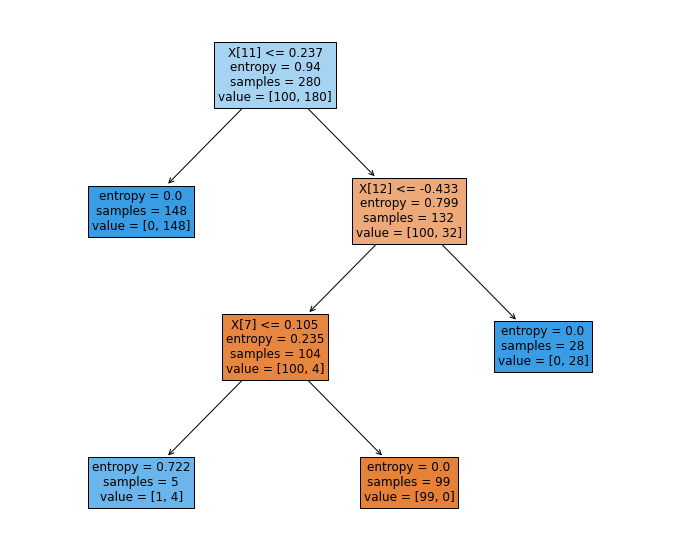

In [177]:
plt.figure(figsize=(12,10))
tree.plot_tree(final_dt, fontsize=12, filled=True)
plt.show()

<a id="random"></a>
### Random Forest Algorithm

In [178]:
xtrain, xtest, ytrain, ytest=train_test_split(inp_sc, out, test_size=0.3, random_state=1)

In [179]:
rf=RandomForestClassifier(random_state=1)
rf.fit(xtrain, ytrain)
ypred=rf.predict(xtest)
print(classification_report(ytest,ypred,digits=4))

              precision    recall  f1-score   support

         0.0     0.9804    1.0000    0.9901        50
         1.0     1.0000    0.9857    0.9928        70

    accuracy                         0.9917       120
   macro avg     0.9902    0.9929    0.9915       120
weighted avg     0.9918    0.9917    0.9917       120



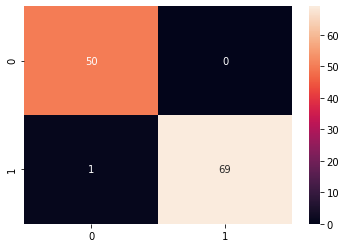

In [180]:
sns.heatmap(confusion_matrix(ytest, ypred), annot=True)
plt.show()

In [202]:
n_estimators = [int(x) for x in np.linspace(start=50, stop=250, num=10)]
max_features = ['auto','sqrt']
max_depth = [1,2]
min_samples_split=[2,5]
min_samples_leaf = [1,2]
bootstrap =[True,False]

In [182]:
param_grid = {
    'n_estimators' : n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'bootstrap':bootstrap,
}

In [183]:
rf_tuning=RandomForestClassifier()
rf_grid = GridSearchCV(estimator=rf_tuning,param_grid=param_grid,cv=3,verbose=2,n_jobs=4)
rf_grid.fit(xtrain,ytrain)

Fitting 3 folds for each of 640 candidates, totalling 1920 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [1, 2, 3, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 72, 94, 116, 138, 161, 183, 205,
                                          227, 250]},
             verbose=2)

In [184]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 205}

In [185]:
res=pd.DataFrame(rf_grid.cv_results_)
res.head()
res.sort_values('std_test_score', ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
441,0.086116,0.007409,0.010957,0.002801,False,2,sqrt,1,2,72,"{'bootstrap': False, 'max_depth': 2, 'max_feat...",1.000000,1.000000,1.000000,1.000000,0.000000,1
152,0.158911,0.021959,0.012131,0.000122,True,2,sqrt,2,5,94,"{'bootstrap': True, 'max_depth': 2, 'max_featu...",1.000000,1.000000,1.000000,1.000000,0.000000,1
87,0.317164,0.029783,0.023589,0.003309,True,2,auto,1,2,205,"{'bootstrap': True, 'max_depth': 2, 'max_featu...",1.000000,1.000000,1.000000,1.000000,0.000000,1
101,0.112352,0.008970,0.008655,0.000454,True,2,auto,2,2,72,"{'bootstrap': True, 'max_depth': 2, 'max_featu...",1.000000,1.000000,1.000000,1.000000,0.000000,1
144,0.247978,0.006267,0.022251,0.001898,True,2,sqrt,2,2,138,"{'bootstrap': True, 'max_depth': 2, 'max_featu...",1.000000,1.000000,1.000000,1.000000,0.000000,1
89,0.393969,0.011411,0.038897,0.008836,True,2,auto,1,2,250,"{'bootstrap': True, 'max_depth': 2, 'max_featu...",1.000000,1.000000,1.000000,1.000000,0.000000,1
110,0.104868,0.009955,0.011612,0.002036,True,2,auto,2,5,50,"{'bootstrap': True, 'max_depth': 2, 'max_featu...",1.000000,1.000000,1.000000,1.000000,0.000000,1
432,0.112379,0.001224,0.012633,0.001224,False,2,auto,2,5,94,"{'bootstrap': False, 'max_depth': 2, 'max_feat...",1.000000,1.000000,1.000000,1.000000,0.000000,1
210,0.090267,0.009499,0.007324,0.000487,True,3,sqrt,1,5,50,"{'bootstrap': True, 'max_depth': 3, 'max_featu...",1.000000,1.000000,1.000000,1.000000,0.000000,1
119,0.449342,0.011804,0.035893,0.006514,True,2,auto,2,5,250,"{'bootstrap': True, 'max_depth': 2, 'max_featu...",1.000000,1.000000,1.000000,1.000000,0.000000,1


In [186]:
rf_model_afterTunig=RandomForestClassifier(random_state=1,bootstrap=True,max_features='auto',min_samples_leaf= 1, min_samples_split= 2,n_estimators=227)
rf_model_afterTunig.fit(xtrain,ytrain)
model_rf_tunig_predict = rf_model_afterTunig.predict(xtest)
print(classification_report(ytest,model_rf_tunig_predict,digits=4))

              precision    recall  f1-score   support

         0.0     0.9804    1.0000    0.9901        50
         1.0     1.0000    0.9857    0.9928        70

    accuracy                         0.9917       120
   macro avg     0.9902    0.9929    0.9915       120
weighted avg     0.9918    0.9917    0.9917       120



In [187]:
rf=RandomForestClassifier(random_state=1)
score =cross_val_score(rf,inp,out,cv = 3, scoring = "f1")
score

array([1.        , 0.99393939, 0.98795181])

In [188]:
np.mean(score), np.std(score)/np.mean(score)

(0.9939637337227699, 0.004948555008738592)

<a id="adaboost"></a>
### AdaBoost Classifier

In [189]:
abc = AdaBoostClassifier(n_estimators=100,learning_rate=1)
model = abc.fit(xtrain, ytrain)
ypred_abc=model.predict(xtest)
ypred_abc
print(classification_report(ytest,ypred_abc,digits=4))

              precision    recall  f1-score   support

         0.0     0.9615    1.0000    0.9804        50
         1.0     1.0000    0.9714    0.9855        70

    accuracy                         0.9833       120
   macro avg     0.9808    0.9857    0.9829       120
weighted avg     0.9840    0.9833    0.9834       120



#### adaboost with lr base model

In [190]:
log=LogisticRegression()
abc1 = AdaBoostClassifier(n_estimators=100,learning_rate=1,base_estimator=log)
model1 = abc1.fit(xtrain, ytrain)
ypred_abc1=model1.predict(xtest)
ypred_abc1
print(classification_report(ytest,ypred_abc1,digits=4))

              precision    recall  f1-score   support

         0.0     0.9434    1.0000    0.9709        50
         1.0     1.0000    0.9571    0.9781        70

    accuracy                         0.9750       120
   macro avg     0.9717    0.9786    0.9745       120
weighted avg     0.9764    0.9750    0.9751       120



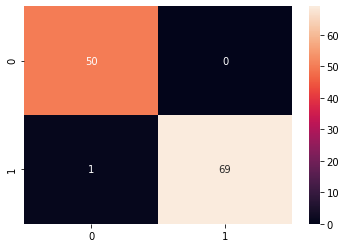

In [191]:
sns.heatmap(confusion_matrix(ytest, ypred), annot=True)
plt.show()

<a id="gradboost"></a>
### Gradient Boosting Classifier

              precision    recall  f1-score   support

         0.0     0.9434    1.0000    0.9709        50
         1.0     1.0000    0.9571    0.9781        70

    accuracy                         0.9750       120
   macro avg     0.9717    0.9786    0.9745       120
weighted avg     0.9764    0.9750    0.9751       120



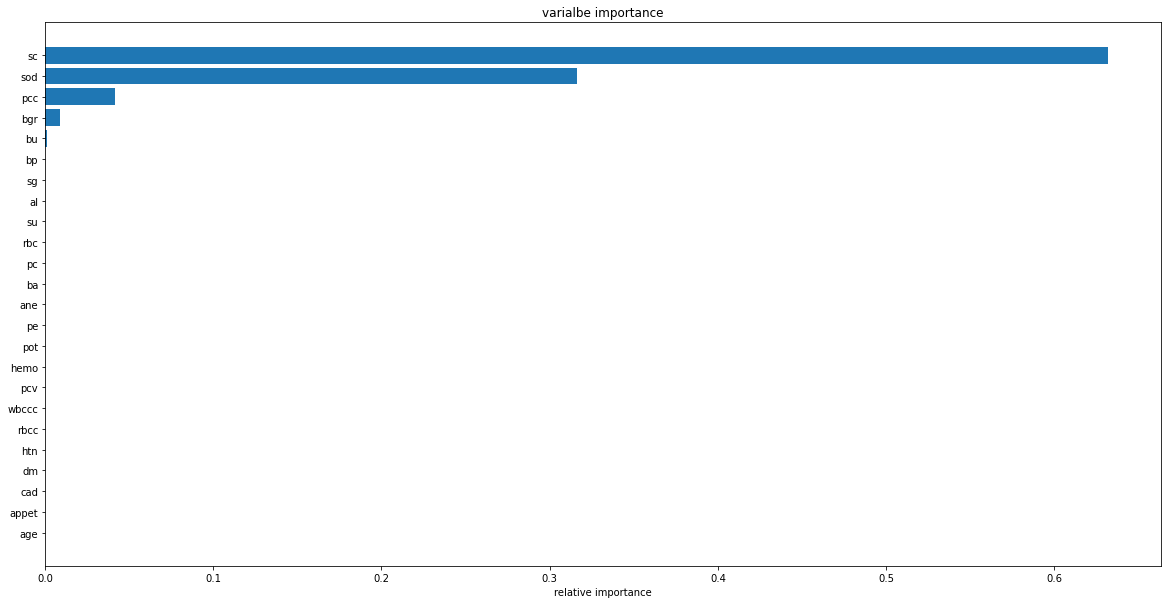

0.8986201070121093

In [192]:
gb=GradientBoostingClassifier(max_depth=2,n_estimators=3,learning_rate=1)
model_gb = gb.fit(xtrain, ytrain)
ypred_gb=model_gb.predict(xtest)
ypred_gb
print(classification_report(ytest,ypred_gb,digits=4))
fea_sel = model_gb.feature_importances_
sorted_idx = np.argsort(fea_sel)
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.figure(figsize=(20,10))
plt.barh(pos, fea_sel[sorted_idx],align='center')
plt.yticks(pos,df.columns[sorted_idx])
plt.xlabel('relative importance')
plt.title('varialbe importance')

plt.show()
r2_score(ypred_gb,ytest)

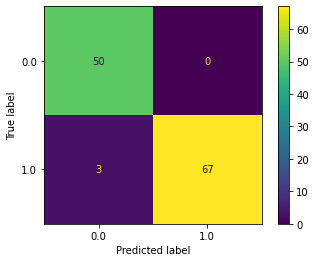

In [193]:
plot_confusion_matrix(model_gb,xtest,ytest)
plt.show()

In [194]:
LR = {'learning_rate':[0.15,0.1,0.10,0.05],'n_estimators':[100,150,200,250]}
tuning = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=LR,scoring='f1')
model_gb_tuning = tuning.fit(xtrain,ytrain)
model_gb_tuning.best_params_,model_gb_tuning.best_score_

({'learning_rate': 0.05, 'n_estimators': 100}, 0.9972602739726029)

              precision    recall  f1-score   support

         0.0     0.9434    1.0000    0.9709        50
         1.0     1.0000    0.9571    0.9781        70

    accuracy                         0.9750       120
   macro avg     0.9717    0.9786    0.9745       120
weighted avg     0.9764    0.9750    0.9751       120



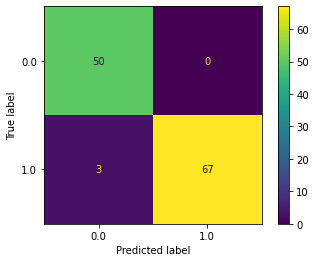

In [195]:
gb=GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,random_state=1)
model_gb = gb.fit(xtrain, ytrain)
ypred_gb=model_gb.predict(xtest)
print(classification_report(ytest,ypred_gb,digits=4))
plot_confusion_matrix(model_gb,xtest,ytest)
plt.show()

<a id="xgboost"></a>
### XGBoost Classifier

In [196]:
xgboo=XGBClassifier()
xgboo_model = xgboo.fit(xtrain, ytrain)
ypred_xgboo=xgboo_model.predict(xtest)
ypred_xgboo
print(classification_report(ytest,ypred_xgboo,digits=4))

[12:51:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0     0.9434    1.0000    0.9709        50
         1.0     1.0000    0.9571    0.9781        70

    accuracy                         0.9750       120
   macro avg     0.9717    0.9786    0.9745       120
weighted avg     0.9764    0.9750    0.9751       120



In [197]:
LR_xgboo = {'learning_rate':[0.15,0.1,0.10,0.05],'n_estimators':[100,150,200,250]}
tuning = GridSearchCV(estimator=XGBClassifier(),param_grid=LR_xgboo,scoring='f1')
model_xgb_tuning = tuning.fit(xtrain,ytrain)
model_xgb_tuning.best_params_,model_xgb_tuning.best_score_

[12:51:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:51:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:51:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:51:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:51:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:51:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:51:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:51:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:51:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:51:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:51:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:51:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

({'learning_rate': 0.05, 'n_estimators': 150}, 0.9972602739726029)

[12:51:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0     0.9434    1.0000    0.9709        50
         1.0     1.0000    0.9571    0.9781        70

    accuracy                         0.9750       120
   macro avg     0.9717    0.9786    0.9745       120
weighted avg     0.9764    0.9750    0.9751       120



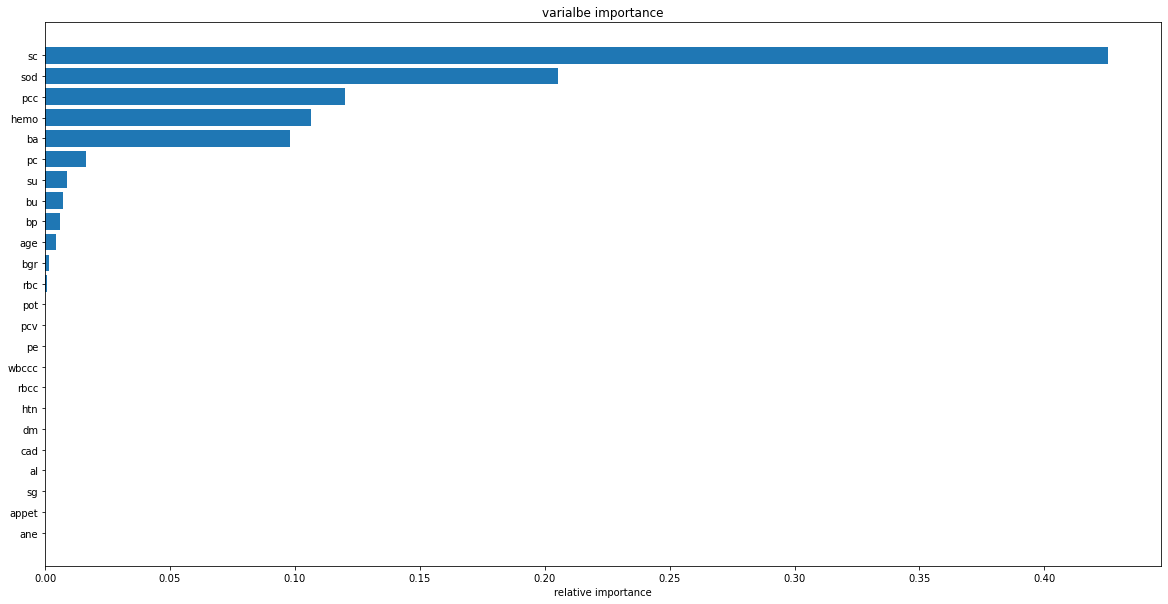

0.8986201070121093

In [198]:
xgboo=XGBClassifier(learning_rate = 0.05, n_estimators=150)
xgboo_model = xgboo.fit(xtrain, ytrain)
ypred_xgboo=xgboo_model.predict(xtest)
print(classification_report(ytest,ypred_xgboo,digits=4))
fea_sel = xgboo_model.feature_importances_
sorted_idx = np.argsort(fea_sel)
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.figure(figsize=(20,10))
plt.barh(pos, fea_sel[sorted_idx],align='center')
plt.yticks(pos,df.columns[sorted_idx])
plt.xlabel('relative importance')
plt.title('varialbe importance')

plt.show()
r2_score(ypred_xgboo,ytest)

In [199]:
models = []
models.append(('LogisticRegression',LogisticRegression()))
models.append(('RandomForest',RandomForestClassifier()))
models.append(('KNeighborsClassifier',KNeighborsClassifier()))
models.append(('SVC',SVC()))
models.append(('AdaBoostClassifier',AdaBoostClassifier()))
models.append(('GradientBoostingClassifier',GradientBoostingClassifier()))
models.append(('XGBClassifier',XGBClassifier()))

In [200]:
results = []
names = []
scoring = 'accuracy'

In [201]:
for name,model_predictions in models:
    model_predictions.fit(xtrain,ytrain)
    prediction = model_predictions.predict(xtest)
    predictions = [round(value) for value in prediction]
    
    accuracy = accuracy_score(ytest,predictions)
    print("Accuracy: %.2f%%" %(accuracy*100.0),name)

Accuracy: 98.33% LogisticRegression
Accuracy: 99.17% RandomForest
Accuracy: 96.67% KNeighborsClassifier
Accuracy: 97.50% SVC
Accuracy: 98.33% AdaBoostClassifier
Accuracy: 97.50% GradientBoostingClassifier
[12:51:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 97.50% XGBClassifier


<a id="conclusion"></a>
### Conclusion

| Classifier | F1 Score | Precision | Sensitivity |
| :---: | :---: | :---: | :---: |
| Logistic Regression(stats) | 71.00 | - | - |
| Logistic Regression(SkLearn) | 98.33 | 98.08 | 98.57 |
| KNN Algorithm | 97.67 | 96.30 | 97.14 |
| Naive Bayes | 99.17 | 99.02 | 99.29 |
| Support Vector Machine | 98.67 | 98.70 | 98.67 |
| Decision Tree Algorithm | 97.5 | 97.17 | 97.87 |
| Random Forest Algorithm | 99.17 | 99.02 | 99.29 |
| AdaBoost Algorithm | 98.33 | 98.08 | 98.57 |
| Gradient Boosting | 97.5 | 97.17 | 97.86 |
| XGBoost | 97.5 | 97.17 | 97.86 |